<a href="https://colab.research.google.com/github/AntonDozhdikov/politpredict/blob/main/5_20_political_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ЗАПУСК ВОССТАНОВЛЕННОГО MADDPG ЭКСПЕРИМЕНТА (50 ЭПОХ, МЕСЯЧНЫЙ ШАГ)
Используемое устройство: cpu
Запуск восстановленного эксперимента с MADDPG агентами...
Загрузка исторических данных...
Загрузка данных для United States...
Загрузка данных для China...
Загрузка данных для Japan...
Загрузка данных для Germany...
Загрузка данных для India...
Загрузка данных для United Kingdom...
Загрузка данных для France...
Загрузка данных для Italy...
Загрузка данных для Brazil...
Загрузка данных для Canada...
Загрузка данных для South Korea...
Загрузка данных для Russia...
Загрузка данных для Australia...
Загрузка данных для Spain...
Загрузка данных для Mexico...
Загрузка данных для Indonesia...
Загрузка данных для Netherlands...
Загрузка данных для Saudi Arabia...
Загрузка данных для Turkey...
Загрузка данных для Switzerland...
Исторические данные успешно загружены.


Эпохи:   0%|          | 0/50 [00:00<?, ?it/s]

Эпизод 1/50
  Средняя награда: 20.63, Кризисов: 4537
  Время эпизода: 0:01:19
  Прошло эксперимента: 0:01:19 | Осталось: 1:05:18
Эпизод 2/50
  Средняя награда: 36.68, Кризисов: 2466
  Время эпизода: 0:01:32
  Прошло эксперимента: 0:02:52 | Осталось: 1:09:07
Эпизод 3/50
  Средняя награда: 56.66, Кризисов: 853
  Время эпизода: 0:01:32
  Прошло эксперимента: 0:04:24 | Осталось: 1:09:09
Эпизод 4/50
  Средняя награда: 83.12, Кризисов: 659
  Время эпизода: 0:01:30
  Прошло эксперимента: 0:05:55 | Осталось: 1:08:06
Эпизод 5/50
  Средняя награда: 129.93, Кризисов: 785
  Время эпизода: 0:01:34
  Прошло эксперимента: 0:07:29 | Осталось: 1:07:29
  Промежуточные результаты сохранены на эпохе 5
Эпизод 6/50
  Средняя награда: 151.18, Кризисов: 712
  Время эпизода: 0:01:32
  Прошло эксперимента: 0:09:02 | Осталось: 1:06:19
Эпизод 7/50
  Средняя награда: 159.18, Кризисов: 810
  Время эпизода: 0:01:29
  Прошло эксперимента: 0:10:31 | Осталось: 1:04:41
Эпизод 8/50
  Средняя награда: 170.08, Кризисов: 85

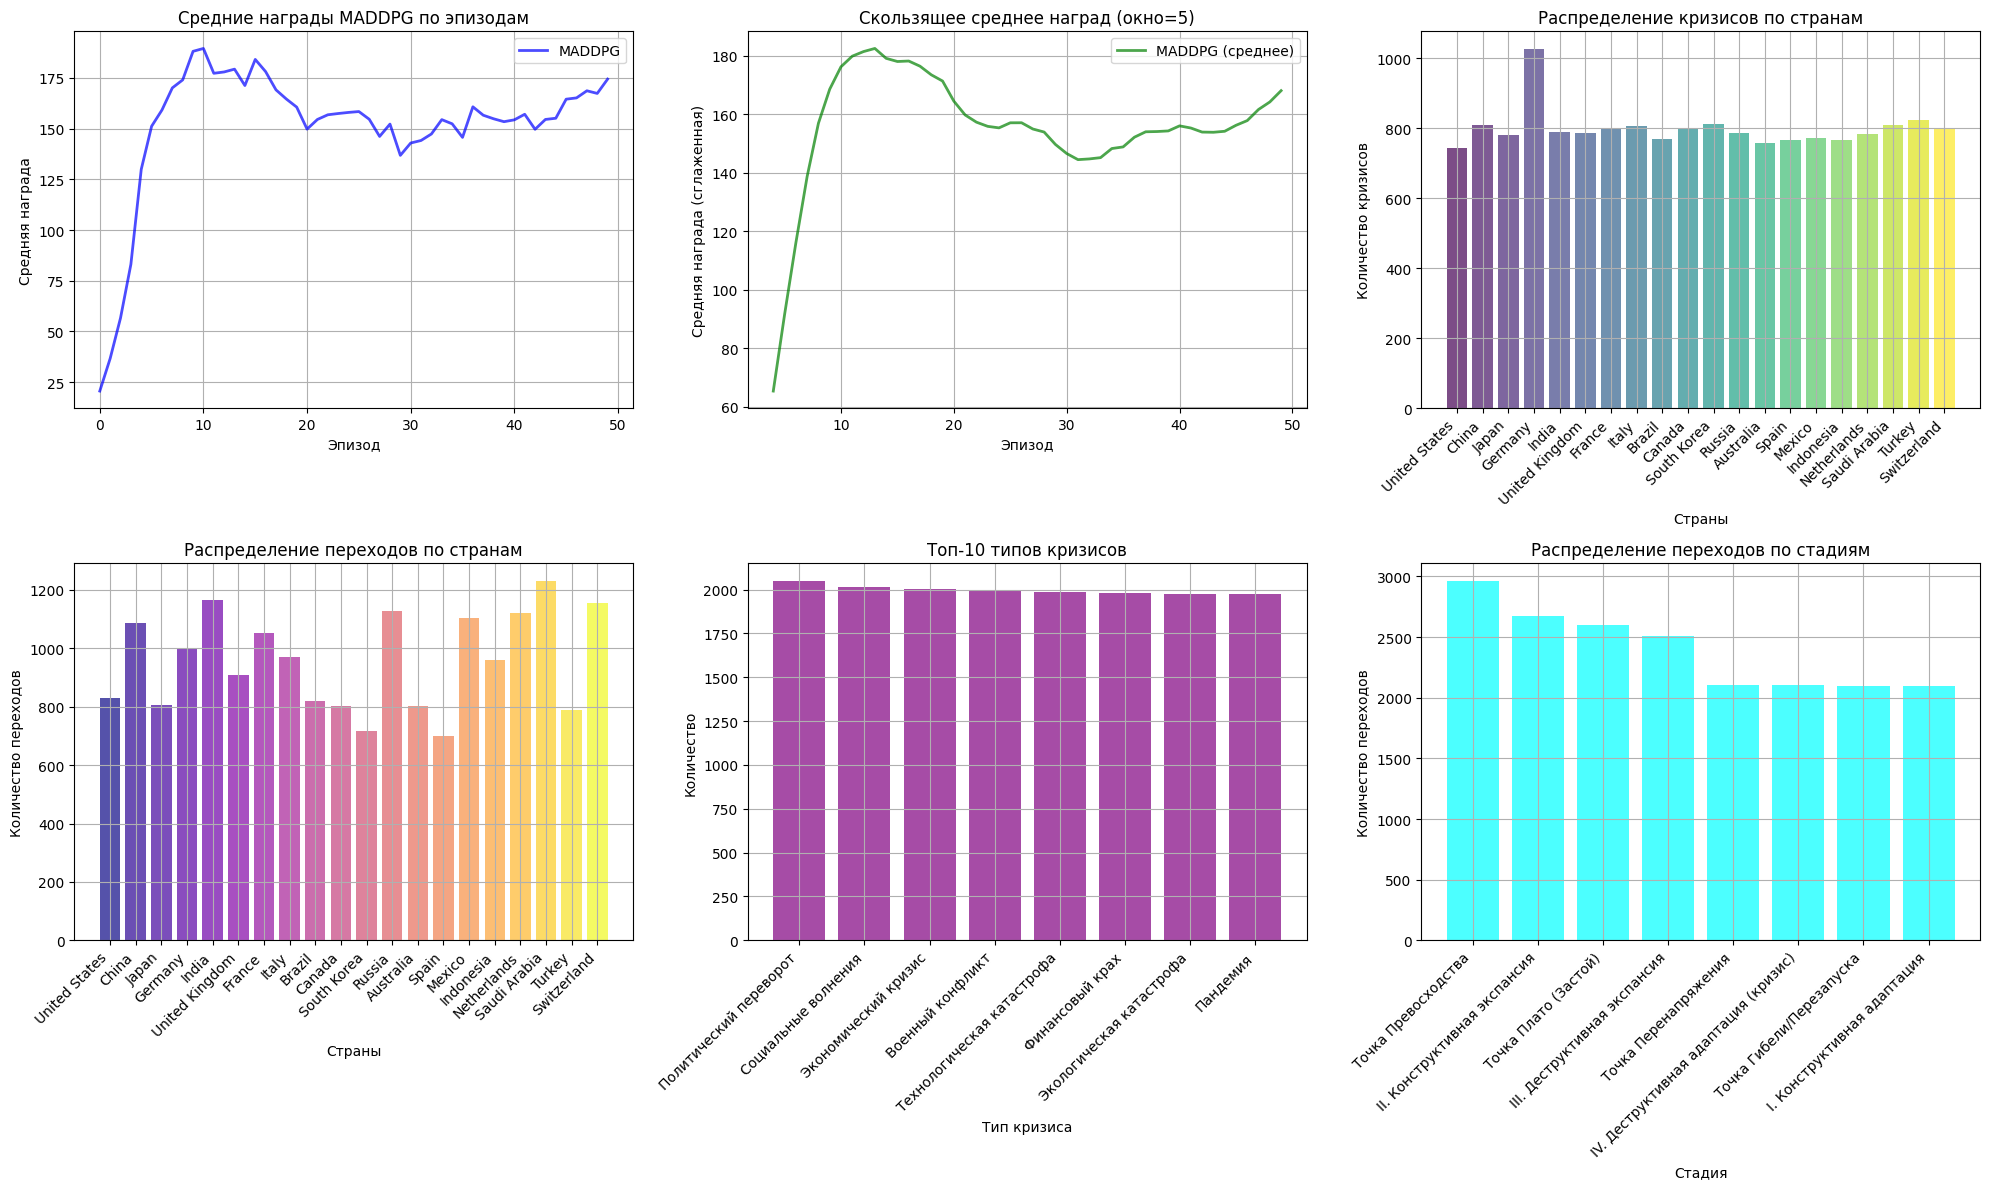

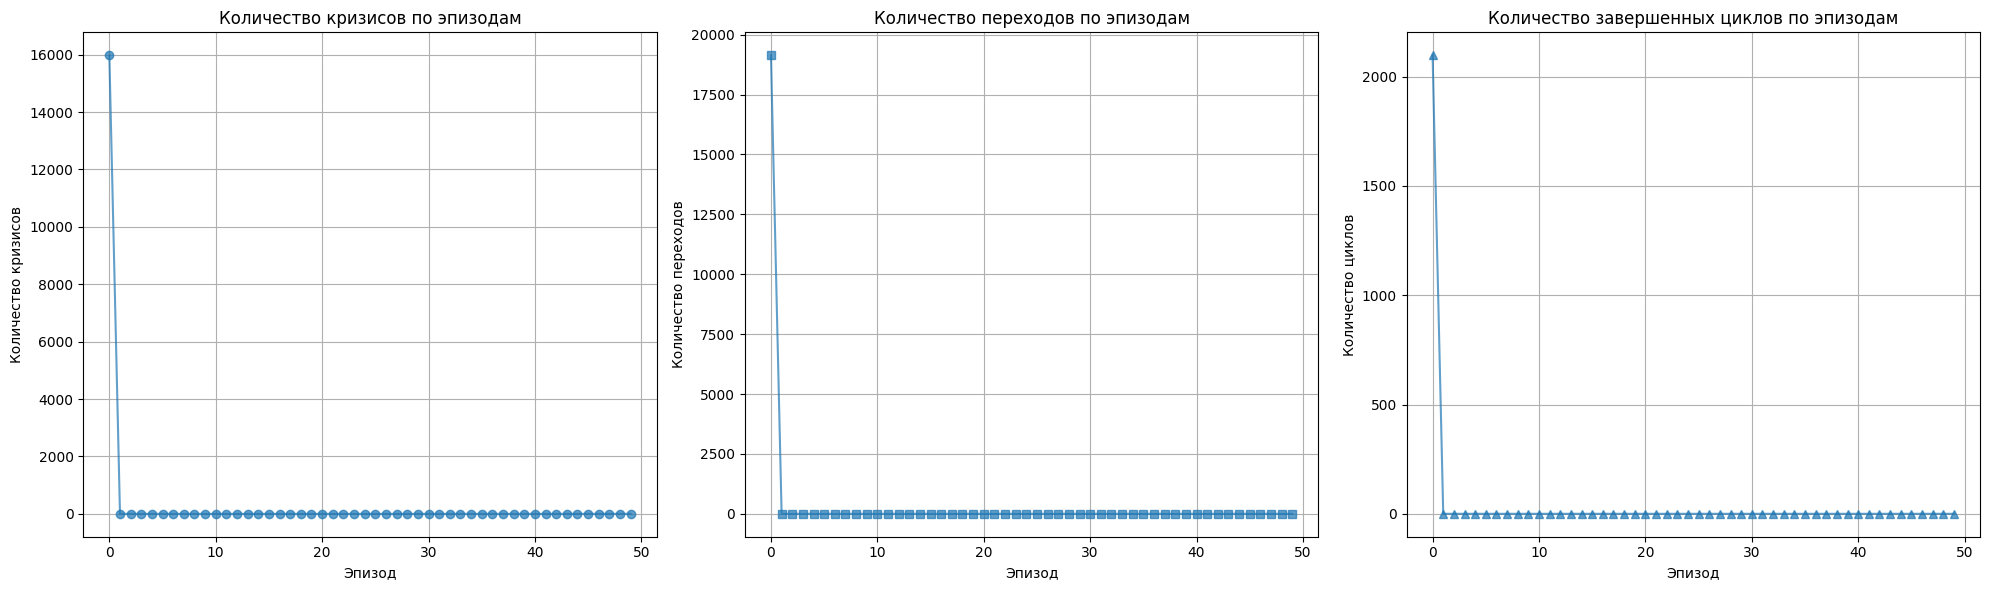

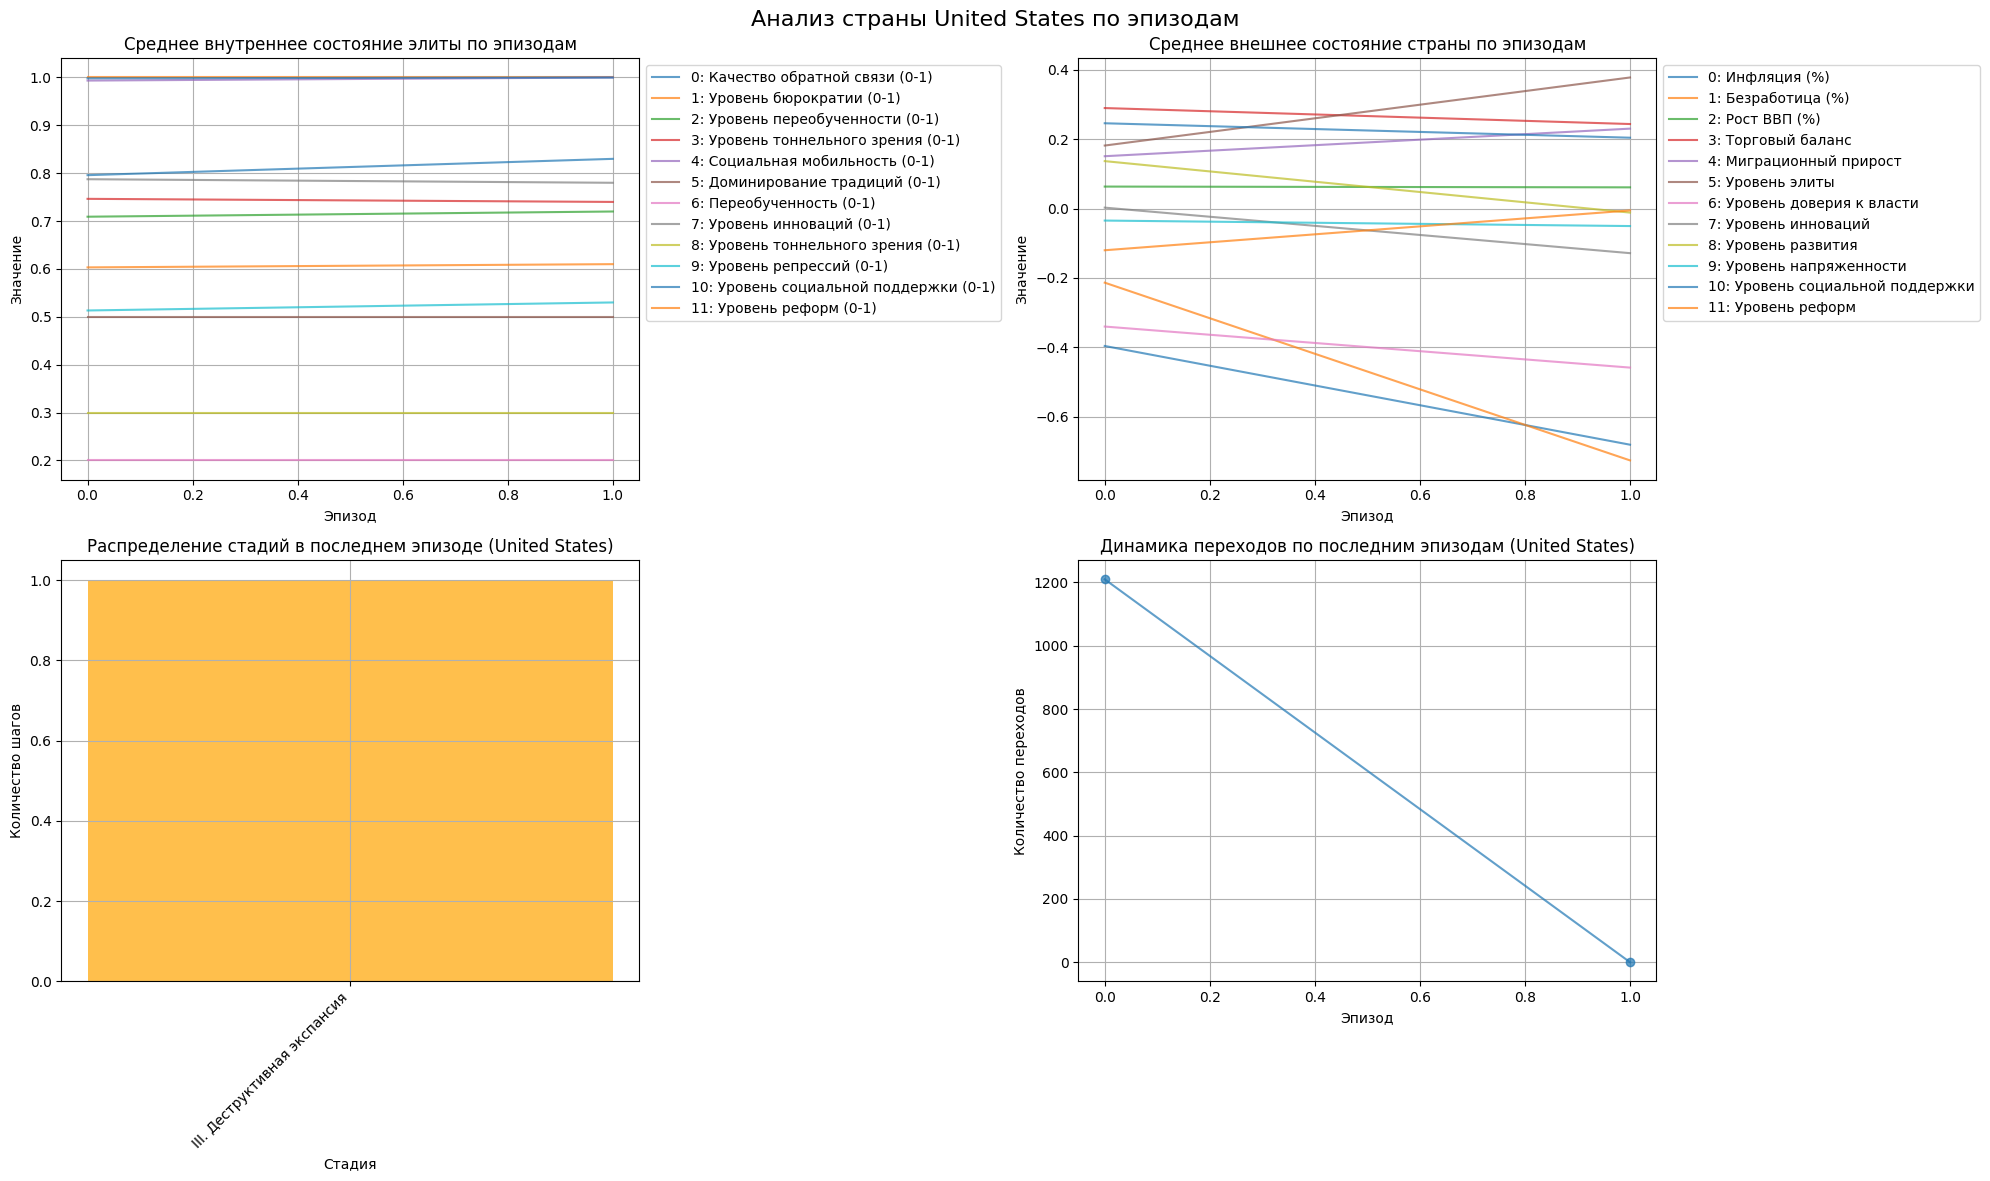

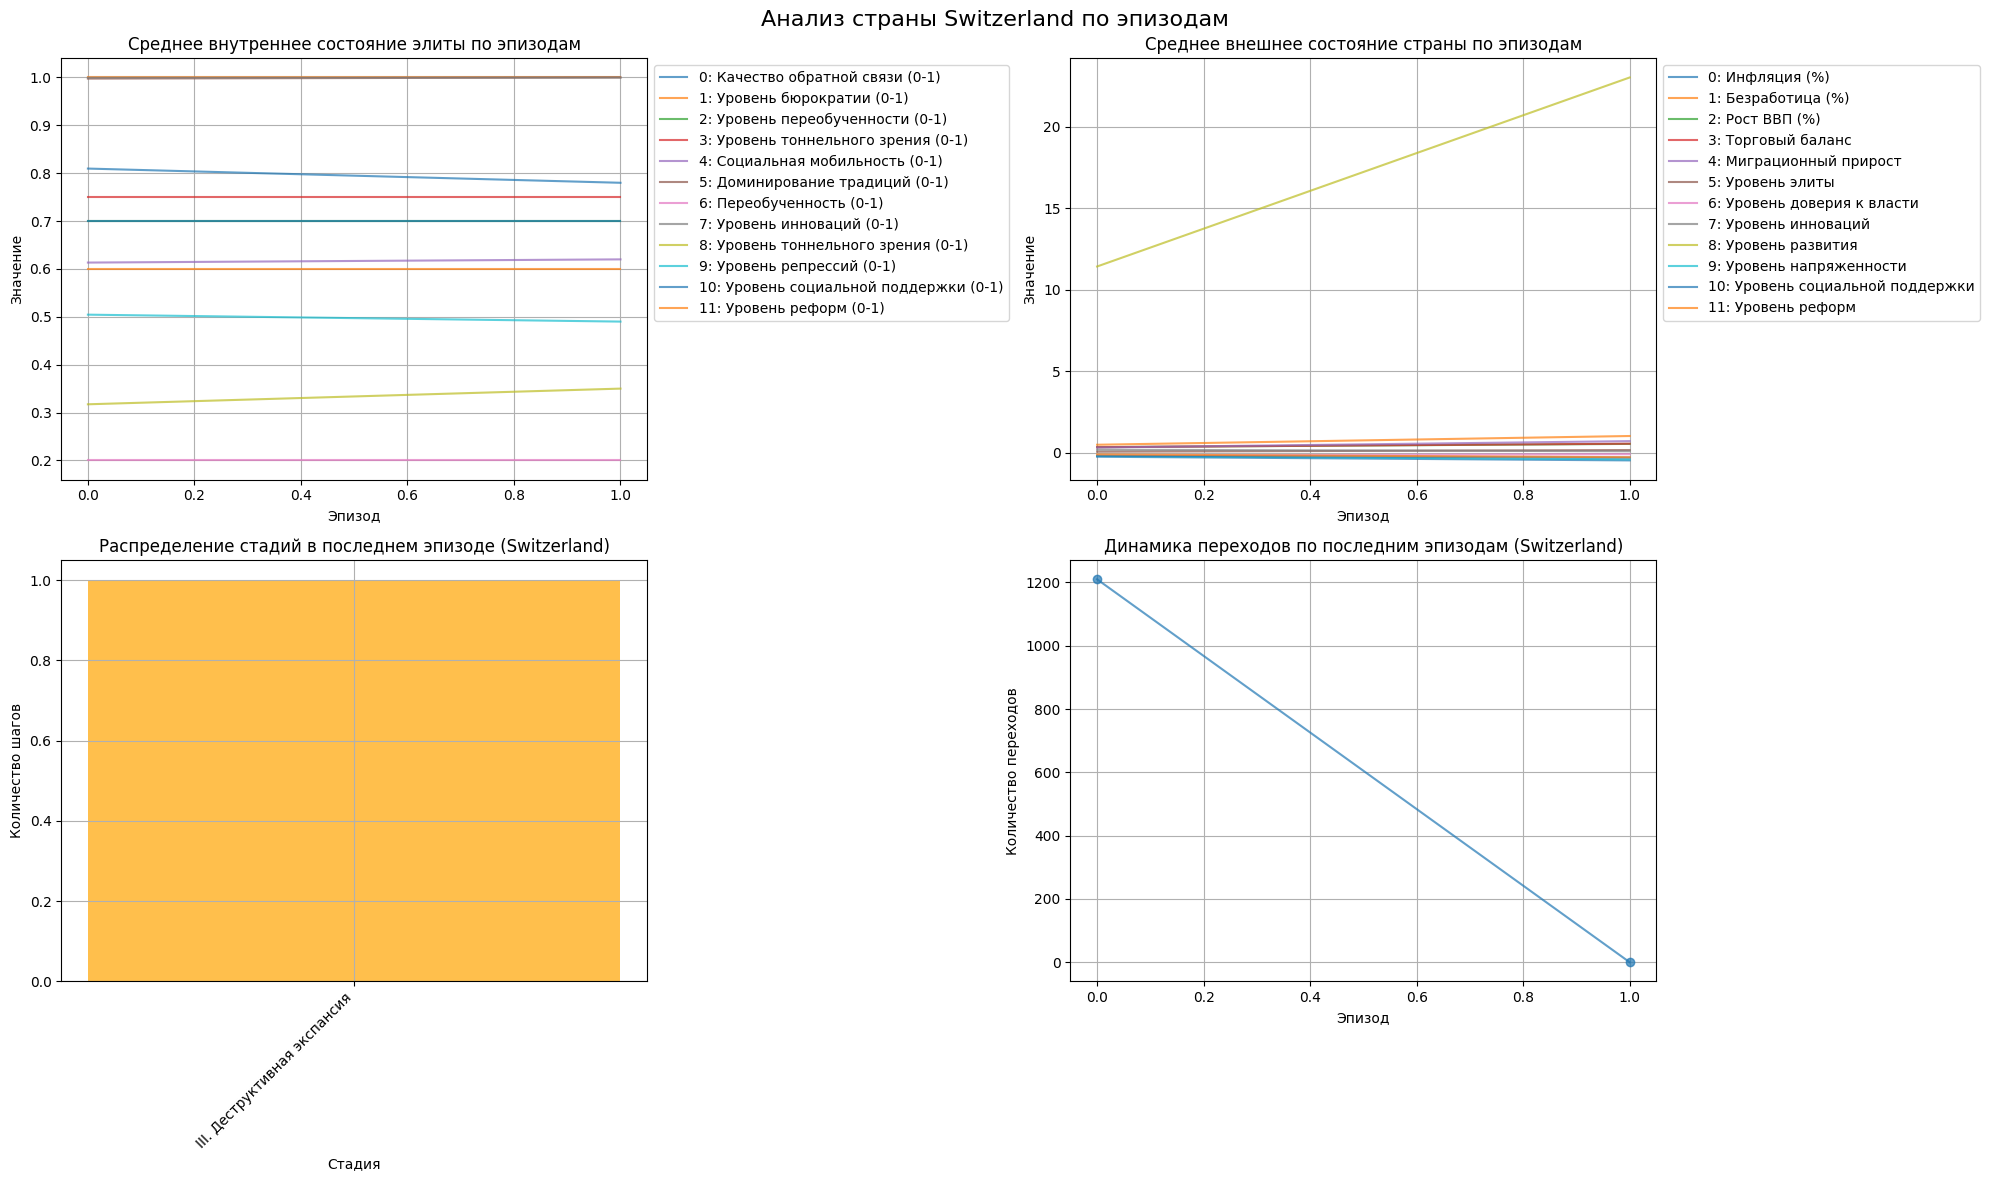

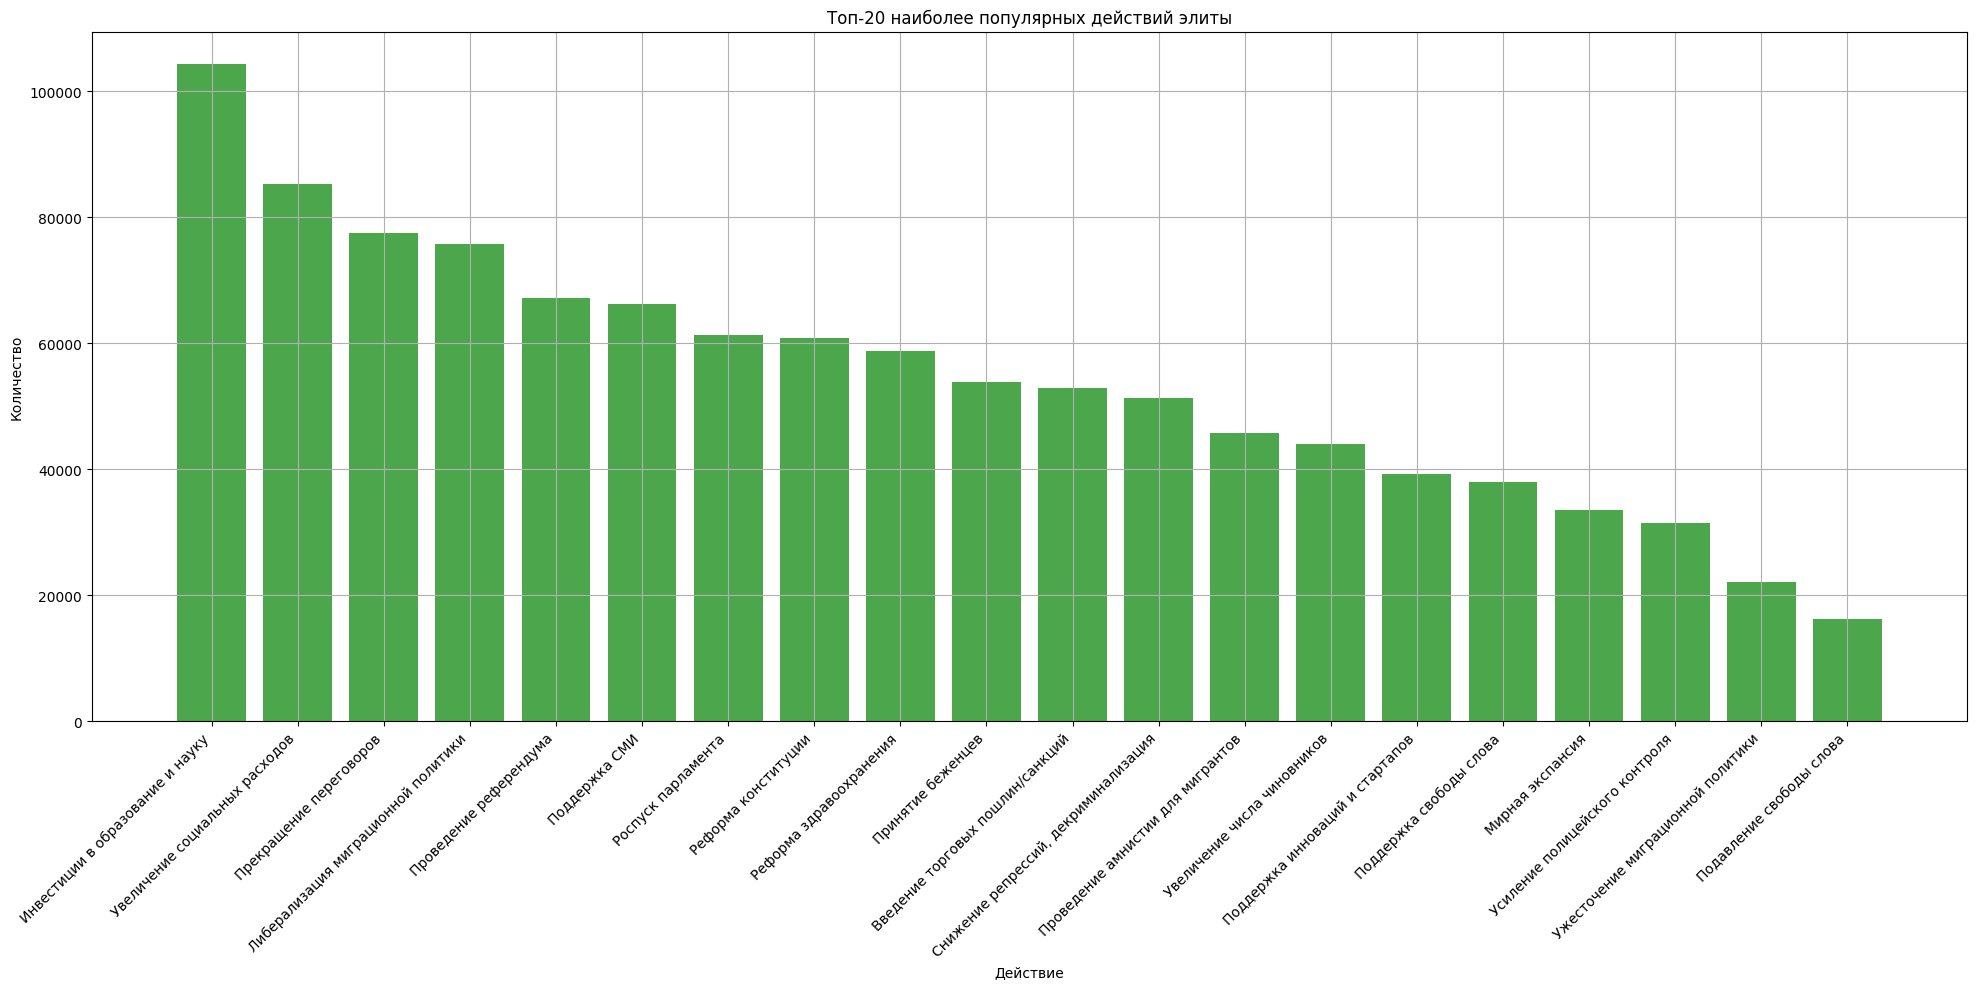

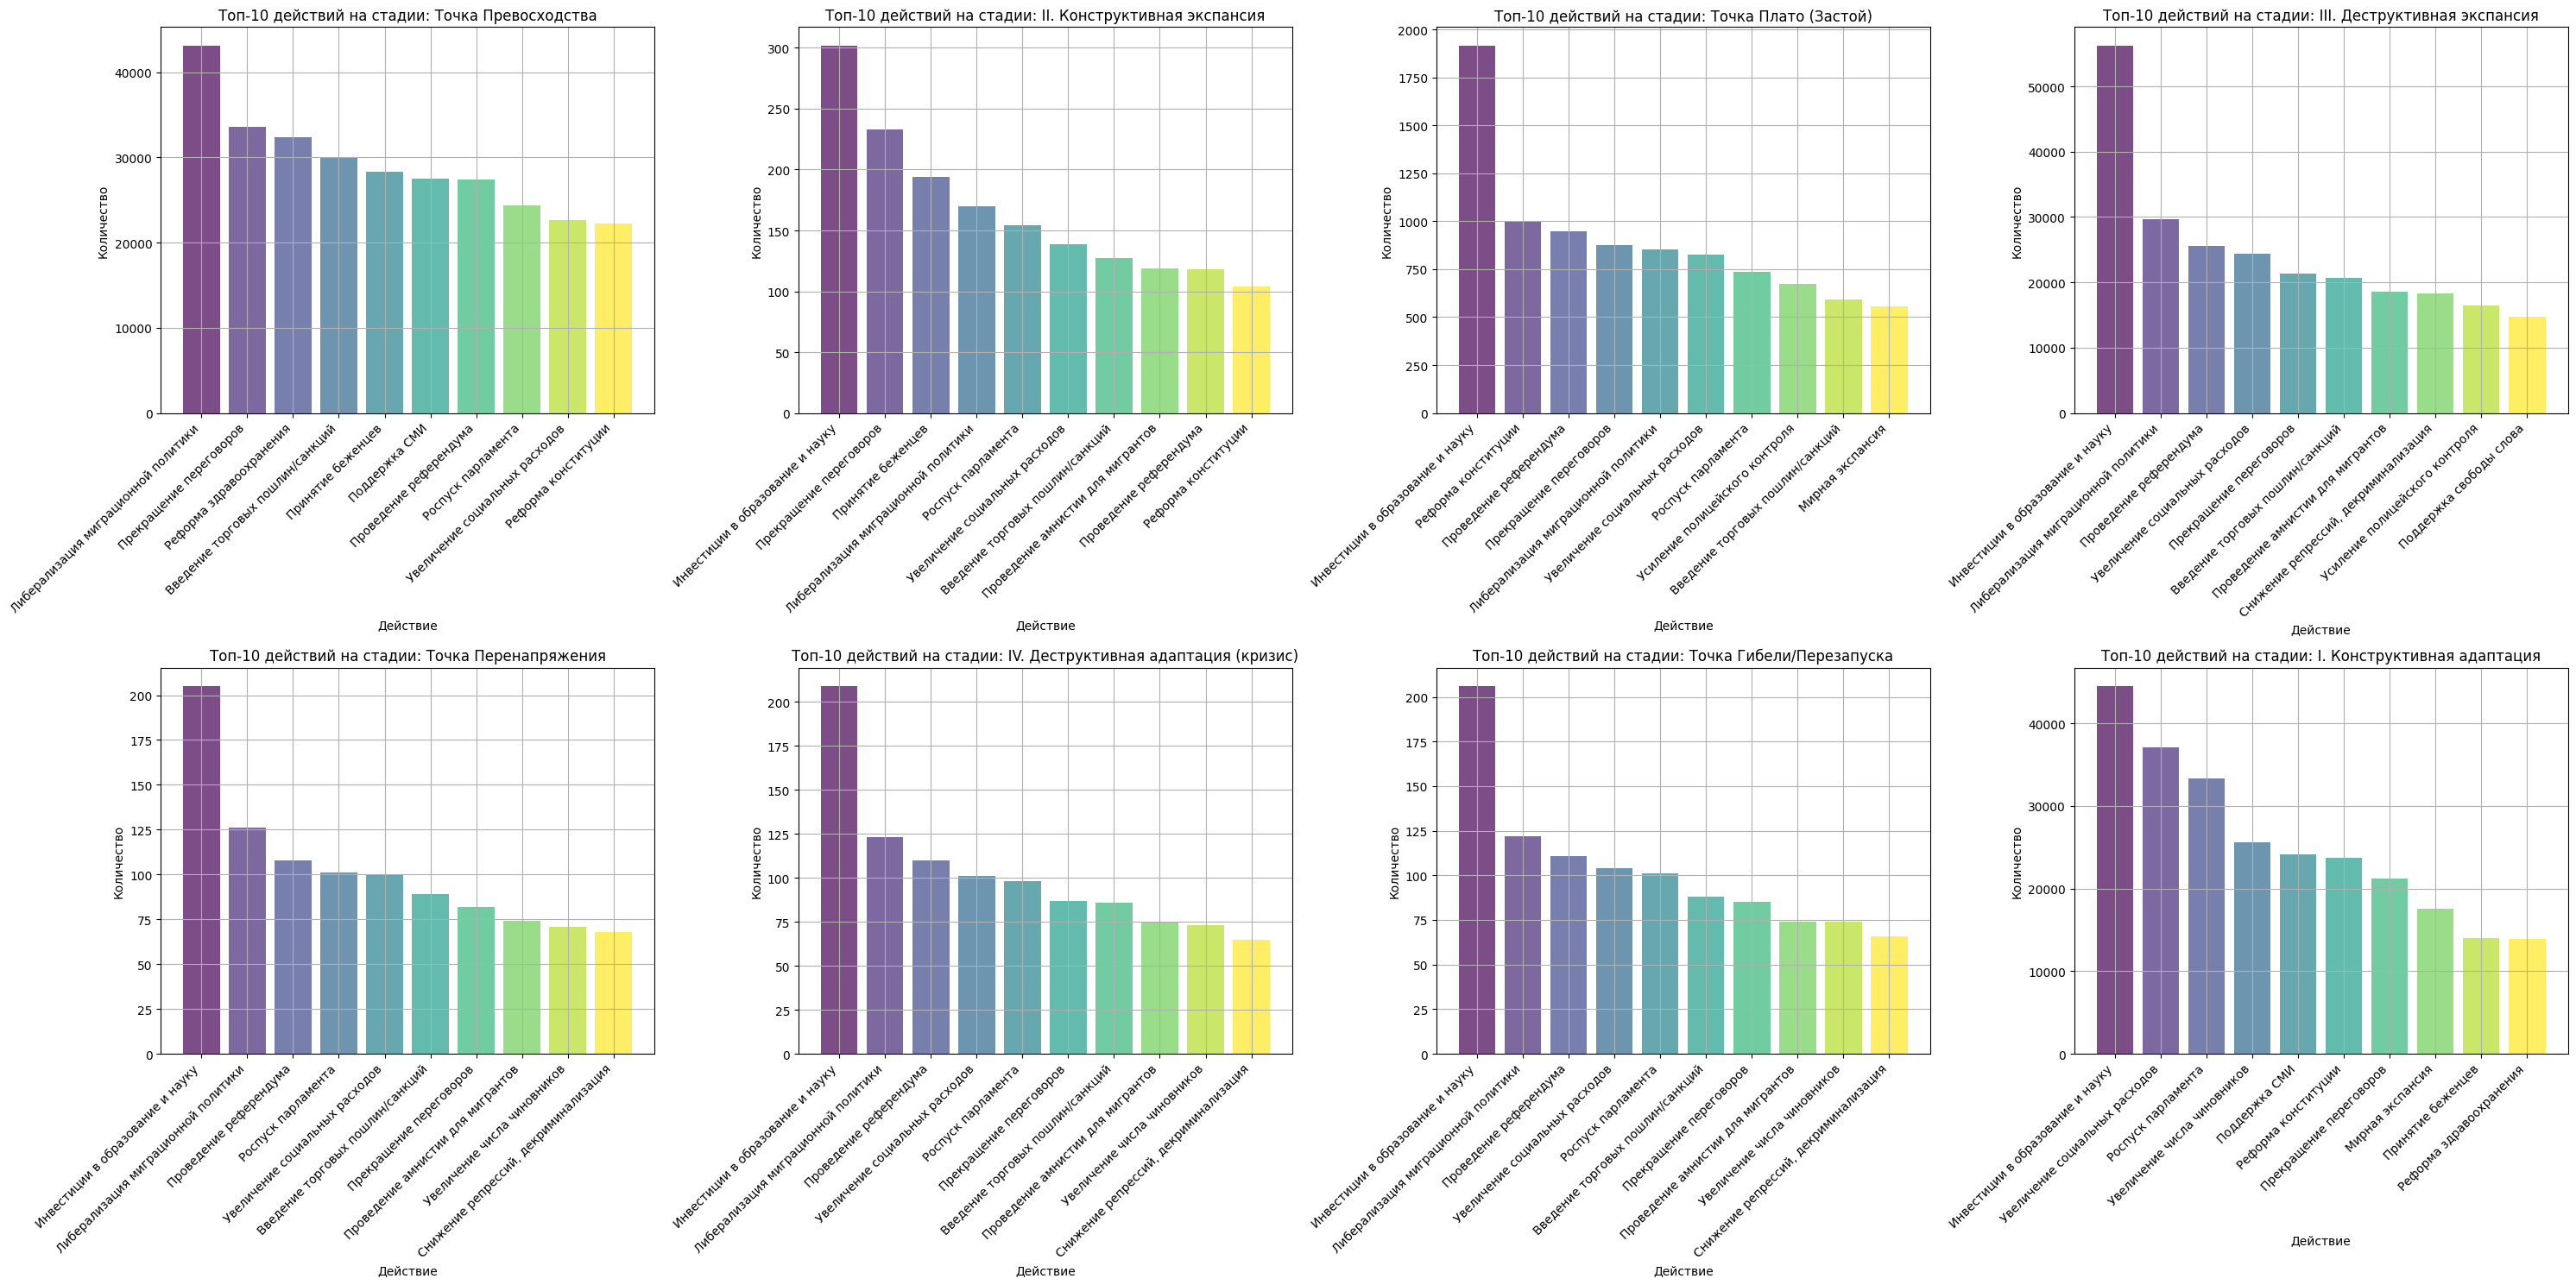


=== ИТОГОВАЯ СВОДКА ДЛЯ MADDPG ===
Средняя награда по всем эпизодам: 151.39 ± 33.23
Общее количество кризисов: 15980
Общее количество переходов между стадиями: 19141
Общее количество завершенных циклов: 34

Топ-5 типов кризисов по частоте:
  Политический переворот: 2047 раз
  Социальные волнения: 2015 раз
  Экономический кризис: 2003 раз
  Военный конфликт: 1993 раз
  Технологическая катастрофа: 1986 раз

Распределение кризисов по странам:
  Germany: 1025 кризисов
  Turkey: 824 кризисов
  South Korea: 813 кризисов
  China: 810 кризисов
  Saudi Arabia: 810 кризисов
  Italy: 805 кризисов
  France: 799 кризисов
  Canada: 799 кризисов
  Switzerland: 796 кризисов
  India: 790 кризисов
  Russia: 787 кризисов
  United Kingdom: 785 кризисов
  Netherlands: 782 кризисов
  Japan: 779 кризисов
  Mexico: 773 кризисов
  Brazil: 769 кризисов
  Indonesia: 767 кризисов
  Spain: 766 кризисов
  Australia: 758 кризисов
  United States: 743 кризисов

Распределение переходов по странам:
  Saudi Arabia: 122

In [1]:
#=============================================================================
# БЛОК 1: ВОССТАНОВЛЕННЫЙ ЭКСПЕРИМЕНТ С MADDPG(50 ЭПОХ, МЕСЯЧНЫЙ ШАГ)
# Версия: v3.2-restored-full-maddpg-improved-viz
#=============================================================================
#--- Импорты и настройки---
import time
import random
import numpy as np
import pandas as pd
from collections import deque, namedtuple, Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import warnings
import json
import requests
from datetime import datetime, timedelta
from tqdm.notebook import tqdm, trange
warnings.filterwarnings("ignore")
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical, Normal
import torch.multiprocessing as mp
from torch.utils.tensorboard import SummaryWriter

# Импорты для виджетов
try:
    import ipywidgets as widgets
    from IPython.display import display, clear_output
    WIDGETS_AVAILABLE = True
except ImportError:
    WIDGETS_AVAILABLE = False
    print("Виджеты ipywidgets не найдены. Будет использована стандартная визуализация.")

#--- КОНФИГУРАЦИЯ---
CONFIG={
'start_year': 2017,
'train_end_year': 2024,
'sim_start_year': 2025,
'sim_end_year': 2125, # 100 лет симуляции
'steps_per_year': 12, # 12 шагов в год (месячный шаг)
'num_episodes': 50,   # 50 эпох обучения
'top_countries': 20,
'observation_total_size': 12,
'observation_in_size': 12,
'action_size': 45,
'hidden_dim': 128,
'lr_actor': 3e-4,
'lr_critic': 3e-4,
'gamma': 0.99,
'tau': 0.01,
'buffer_size': int(1e6),
'batch_size': 256,
'update_every': 10,
'epsilon_start': 1.0,
'epsilon_end': 0.01,
'epsilon_decay': 0.995,
'clip_epsilon': 0.2,
'gae_lambda': 0.95,
'ppo_epochs': 3,
'entropy_coef': 0.01,
'max_grad_norm': 0.5,
'device': torch.device("cuda" if torch.cuda.is_available() else "cpu"),
'save_dir_base': 'experiment_results_maddpg_improved_v32_restored',
'data_dir': 'data',
# Параметры циклов
'max_cycles_per_country': 4,
'min_stage_duration_years': 1,
'max_stage_duration_years': 15,
'max_plateau_duration_years': 10,
'transition_duration_years': 2,
'min_years_between_crises': 3,
'crisis_series_probability': 0.1,
}
os.makedirs(CONFIG['save_dir_base'], exist_ok=True)
os.makedirs(CONFIG['data_dir'], exist_ok=True)

#--- МОДЕЛЬ СРЕДЫ (CountrySystem)---
class CountrySystem:
    """Улучшенная модель социально-политической системы страны."""
    STAGES=[
        "I. Конструктивная адаптация",
        "Точка Превосходства",
        "II. Конструктивная экспансия",
        "Точка Плато (Застой)",
        "III. Деструктивная экспансия",
        "Точка Перенапряжения",
        "IV. Деструктивная адаптация (кризис)",
        "Точка Гибели/Перезапуска"
    ]

    CRISIS_TYPES=[
        "Финансовый кризис", "Экономический кризис", "Политический переворот",
        "Социальные волнения", "Военный конфликт", "Экологическая катастрофа",
        "Финансовый крах", "Пандемия", "Технологическая катастрофа",
        "Кризис легитимности", "Кризис доверия", "Кризис идентичности",
        "Кризис управления", "Кризис элит", "Кризис институтов"
    ]

    # Описание внутреннего состояния элиты
    INTERNAL_STATE_DESCRIPTIONS = [
        "Качество обратной связи (0-1)", "Уровень бюрократии (0-1)", "Уровень переобученности (0-1)",
        "Уровень тоннельного зрения (0-1)", "Социальная мобильность (0-1)", "Доминирование традиций (0-1)",
        "Переобученность (0-1)", "Уровень инноваций (0-1)", "Уровень тоннельного зрения (0-1)",
        "Уровень репрессий (0-1)", "Уровень социальной поддержки (0-1)", "Уровень реформ (0-1)"
    ]

    # Описание внешнего состояния страны
    EXTERNAL_STATE_DESCRIPTIONS = [
        "Инфляция (%)", "Безработица (%)", "Рост ВВП (%)", "Торговый баланс", "Миграционный прирост",
        "Уровень элиты", "Уровень доверия к власти", "Уровень инноваций", "Уровень развития",
        "Уровень напряженности", "Уровень социальной поддержки", "Уровень реформ"
    ]

    def __init__(self, name, initial_state):
        self.name = name
        self.state = initial_state.copy()
        self.internal_state = self._initialize_internal_state()
        self.stage = "I. Конструктивная адаптация"
        self.history = []
        self.crisis_history = []
        self.stage_transitions = []
        self.step_count = 0
        self.year = CONFIG['sim_start_year']
        self.month = 1
        self.last_crisis_year = CONFIG['sim_start_year'] - CONFIG['min_years_between_crises'] # Инициализация для возможности кризиса с самого начала
        self.cycle_count = 0 # Инициализация счетчика циклов
        self.superiority_points = 0 # Счетчик для достижения "Точки Превосходства"
        self.last_stage = None # Для отслеживания последней стадии
        self.actions_history = [] # История действий

    def _initialize_internal_state(self):
        """Инициализирует внутреннее состояние элиты."""
        return np.array([
            0.8, 1.0, 0.7, 0.75, 0.6, 0.5, 0.2, 0.8, 0.3, 0.5, 0.7, 0.6
        ])

    def get_observation_total(self):
        """Возвращает полное наблюдение о состоянии страны."""
        return self.state

    def get_observation_in(self):
        """Возвращает внутреннее наблюдение о состоянии элиты."""
        return self.internal_state

    def apply_action(self, action):
        """
        Применяет действие элиты и обновляет состояние системы.
        Возвращает награду и информацию о кризисах.
        """
        reward = 0
        crisis_event = None

        # Сохраняем действие в истории
        self.actions_history.append({
            'step': self.step_count,
            'year': self.year,
            'month': self.month,
            'action': action
        })

        # Обновление внутреннего состояния элиты на основе действия
        self._update_internal_state(action)

        # Обновление внешнего состояния страны
        self._update_external_state(action)

        # Проверка на кризисы
        crisis_event = self._check_for_crisis()
        if crisis_event and self._can_have_crisis():
            self.crisis_history.append({
                'step': self.step_count,
                'year': self.year,
                'month': self.month,
                'crisis': crisis_event
            })
            self.last_crisis_year = self.year
            reward -= 50 # Штраф за кризис

        # Проверка перехода между стадиями
        new_stage = self._check_stage_transition()
        if new_stage != self.stage:
            self.stage_transitions.append({
                'step': self.step_count,
                'year': self.year,
                'month': self.month,
                'from_stage': self.stage,
                'to_stage': new_stage
            })
            self.last_stage = self.stage
            self.stage = new_stage
            reward += self._get_stage_reward(new_stage)

        # Награда за стабильность и эффективность
        reward += self._calculate_stability_reward()

        # Обновление времени
        self.step_count += 1
        self.month += 1
        if self.month > 12:
            self.month = 1
            self.year += 1

        self.history.append({
            'step': self.step_count,
            'state': self.state.copy(),
            'internal_state': self.internal_state.copy(),
            'stage': self.stage,
            'year': self.year,
            'month': self.month
        })

        return reward, crisis_event is not None

    def _can_have_crisis(self):
        """Проверяет, может ли страна иметь кризис (не чаще 1 раза в 3 года)."""
        return (self.year - self.last_crisis_year) >= CONFIG['min_years_between_crises']

    def _update_internal_state(self, action):
        """Обновляет внутреннее состояние элиты на основе действия."""
        action_effects = np.zeros_like(self.internal_state)
        # Определяем эффекты для каждого действия
        if action == 0: # Повышение налогов
            action_effects[0] -= 0.03; action_effects[2] -= 0.01; action_effects[9] -= 0.01
        elif action == 1: # Снижение налогов
            action_effects[0] += 0.02; action_effects[2] += 0.01; action_effects[9] += 0.02
        elif action == 2: # Увеличение социальных расходов
            action_effects[4] += 0.03; action_effects[10] += 0.02; action_effects[9] += 0.01
        elif action == 3: # Сокращение социальных расходов
            action_effects[4] -= 0.02; action_effects[10] -= 0.01; action_effects[9] -= 0.01
        elif action == 4: # Реформа пенсионной системы
            action_effects[4] += 0.02; action_effects[1] += 0.02
        elif action == 5: # Реформа здравоохранения
            action_effects[0] += 0.01; action_effects[10] += 0.01
        elif action == 6: # Инвестиции в образование и науку
            action_effects[5] += 0.04; action_effects[7] += 0.03
        elif action == 7: # Поддержка инноваций и стартапов
            action_effects[5] += 0.05; action_effects[11] += 0.04
        elif action == 8: # Ужесточение миграционной политики
            action_effects[4] -= 0.01; action_effects[10] -= 0.01
        elif action == 9: # Либерализация миграционной политики
            action_effects[4] += 0.02; action_effects[10] += 0.01
        elif action == 10: # Проведение амнистии для мигрантов
            action_effects[4] += 0.01; action_effects[10] += 0.02
        elif action == 11: # Усиление полицейского контроля
            action_effects[0] -= 0.01; action_effects[9] -= 0.02
        elif action == 12: # Снижение репрессий, декриминализация
            action_effects[0] += 0.03; action_effects[9] += 0.02
        elif action == 13: # Проведение выборов (честных, свободных)
            action_effects[0] += 0.03; action_effects[7] += 0.03
        elif action == 14: # Фальсификация выборов
            action_effects[0] -= 0.03; action_effects[7] -= 0.02
        elif action == 15: # Роспуск парламента
            action_effects[0] -= 0.02; action_effects[8] += 0.04
        elif action == 16: # Распуск оппозиционных партий
            action_effects[0] -= 0.03; action_effects[7] -= 0.02
        elif action == 17: # Преследование оппозиционеров
            action_effects[0] -= 0.02; action_effects[8] += 0.02
        elif action == 18: # Амнистия политзаключенных
            action_effects[0] += 0.01; action_effects[10] += 0.01
        elif action == 19: # Реформа судебной системы
            action_effects[0] += 0.02; action_effects[11] += 0.01
        elif action == 20: # Укрепление независимости судов
            action_effects[0] += 0.03; action_effects[7] += 0.02
        elif action == 21: # Подавление свободы слова
            action_effects[0] -= 0.03; action_effects[7] -= 0.02
        elif action == 22: # Поддержка свободы слова
            action_effects[0] += 0.03; action_effects[7] += 0.02
        elif action == 23: # Введение цензуры
            action_effects[0] -= 0.02; action_effects[8] += 0.02
        elif action == 24: # Поддержка СМИ
            action_effects[0] += 0.02; action_effects[7] += 0.01
        elif action == 25: # Проведение референдума
            action_effects[0] += 0.01; action_effects[7] += 0.01
        elif action == 26: # Реформа конституции
            action_effects[11] += 0.03; action_effects[5] -= 0.01
        elif action == 27: # Увеличение числа чиновников
            action_effects[1] -= 0.01; action_effects[8] += 0.01
        elif action == 28: # Сокращение бюрократии
            action_effects[1] += 0.02; action_effects[11] += 0.01
        elif action == 29: # Борьба с коррупцией (эффективная)
            action_effects[0] += 0.03; action_effects[10] += 0.02
        elif action == 30: # Имитация борьбы с коррупцией
            action_effects[0] -= 0.01; action_effects[10] -= 0.01
        elif action == 31: # Заключение торгового соглашения
            action_effects[3] += 0.01; action_effects[11] += 0.01
        elif action == 32: # Введение торговых пошлин/санкций
            action_effects[3] -= 0.01; action_effects[9] -= 0.01
        elif action == 33: # Поддержка экспорта
            action_effects[3] += 0.02; action_effects[11] += 0.01
        elif action == 34: # Поддержка импорта
            action_effects[3] += 0.01; action_effects[5] -= 0.01
        elif action == 35: # Заключение военного альянса
            action_effects[9] -= 0.02; action_effects[8] += 0.01
        elif action == 36: # Выход из военного альянса
            action_effects[9] += 0.01; action_effects[11] += 0.01
        elif action == 37: # Начало переговоров
            action_effects[0] += 0.01; action_effects[3] += 0.01
        elif action == 38: # Прекращение переговоров
            action_effects[0] -= 0.01; action_effects[3] -= 0.01
        elif action == 39: # Ведение войны (наступательной)
            action_effects[9] -= 0.03; action_effects[8] += 0.03
        elif action == 40: # Ведение войны (оборонительной)
            action_effects[9] -= 0.02; action_effects[10] -= 0.01
        elif action == 41: # Отправка миротворцев
            action_effects[0] += 0.01; action_effects[3] += 0.01
        elif action == 42: # Принятие беженцев
            action_effects[4] += 0.02; action_effects[10] += 0.01
        elif action == 43: # Отказ от беженцев
            action_effects[4] -= 0.01; action_effects[10] -= 0.01
        elif action == 44: # Мирная экспансия
            action_effects[5] += 0.02; action_effects[11] += 0.02

        self.internal_state = np.clip(self.internal_state + action_effects, 0.0, 1.0)

    def _update_external_state(self, action):
        """Обновляет внешнее состояние страны на основе действия."""
        noise = np.random.normal(0, 0.01, len(self.state))
        self.state = self.state + noise
        if action == 0:
            self.state[0] -= 0.05; self.state[1] += 0.1
        elif action == 2:
            self.state[4] += 0.05; self.state[6] -= 0.03
        elif action == 6:
            self.state[8] += 0.02
        elif action == 7:
            self.state[8] += 0.03
        elif action == 39:
            self.state[0] -= 0.2; self.state[1] += 0.3; self.state[2] += 0.2

    def _check_for_crisis(self):
        """Проверяет наличие кризисов с учетом стадии и внутреннего состояния."""
        crisis_probability = 0.0
        # Базовая вероятность кризиса
        crisis_probability += 0.02
        # Кризисы первого бугра (перепроизводство элиты)
        if self.internal_state[4] < 0.3 and self.state[5] > 0.7:
            crisis_probability += 0.1
        # Кризисы второго бугра (молодые мигранты)
        if self.state[4] > 1.0 and self.internal_state[10] < 0.5:
            crisis_probability += 0.12
        # Общая нестабильность
        if self.internal_state[0] < 0.3 and self.internal_state[2] < 0.4:
            crisis_probability += 0.15
        # Экономический кризис
        if self.state[0] < -2.0 or self.state[1] > 15.0:
            crisis_probability += 0.25

        if np.random.random() < crisis_probability:
            crises = [
                "Политический переворот", "Экономический кризис", "Социальные волнения",
                "Военный конфликт", "Экологическая катастрофа", "Финансовый крах",
                "Пандемия", "Технологическая катастрофа"
            ]
            return np.random.choice(crises)
        return None

    def _check_stage_transition(self):
        """Проверяет необходимость перехода между стадиями."""
        # Проверка на максимальное количество циклов
        if self.cycle_count >= CONFIG['max_cycles_per_country']:
            return self.stage # Блокируем новые циклы

        current_stage = self.stage
        years_in_stage = self.year - (self.stage_transitions[-1]['year'] if self.stage_transitions else CONFIG['sim_start_year']) + 1

        # Логика переходов с учетом новой последовательности
        # Увеличиваем вероятность переходов на более поздние стадии, если страна долго находится в текущей
        years_threshold_for_forced_transition = 20 # Если страна > 20 лет в одной стадии, повышаем шанс перехода

        if current_stage == "I. Конструктивная адаптация":
            # Переход в Точку Превосходства
            if years_in_stage >= CONFIG['min_stage_duration_years'] and self.internal_state[0] > 0.7 and self.internal_state[4] > 0.6:
                return "Точка Превосходства"
            # Принудительный переход, если застряли
            elif years_in_stage >= years_threshold_for_forced_transition and np.random.random() < 0.1:
                 return "Точка Превосходства"

        elif current_stage == "Точка Превосходства":
            # Переход в Стадию II
            if years_in_stage >= 1 and self.internal_state[5] > 0.6 and self.internal_state[7] > 0.5:
                return "II. Конструктивная экспансия"
            # Принудительный переход, если застряли
            elif years_in_stage >= years_threshold_for_forced_transition and np.random.random() < 0.1:
                 return "II. Конструктивная экспансия"

        elif current_stage == "II. Конструктивная экспансия":
            # Переход в Точку Плато (Застой)
            if years_in_stage >= CONFIG['min_stage_duration_years']:
                # 80% случаев - переход в застой
                if np.random.random() < 0.8 or (self.internal_state[5] > 0.7 and self.internal_state[7] < 0.4):
                    return "Точка Плато (Застой)"
                # 20% случаев - возможен возврат в Точку Превосходства (временный шаг назад)
                elif np.random.random() < 0.2 and self.internal_state[0] > 0.8:
                    return "Точка Превосходства"
            # Принудительный переход, если застряли
            elif years_in_stage >= years_threshold_for_forced_transition and np.random.random() < 0.1:
                 return "Точка Плато (Застой)"

        elif current_stage == "Точка Плато (Застой)":
            # Минимум 2 года на плато
            if years_in_stage >= 2:
                # 90% случаев - переход в III. Деструктивная экспансия
                if np.random.random() < 0.9:
                    return "III. Деструктивная экспансия"
                # 10% случаев - возможен возврат в II. Конструктивная экспансия (только после сильных реформ)
                elif np.random.random() < 0.1 and self.internal_state[0] > 0.8 and self.internal_state[7] > 0.7:
                    return "II. Конструктивная экспансия"
            # Принудительный переход, если застряли (но не сразу, даем шанс стабилизироваться)
            elif years_in_stage >= years_threshold_for_forced_transition and np.random.random() < 0.05:
                 return "III. Деструктивная экспансия" # Меньше шанс, чтобы не было слишком много

        elif current_stage == "III. Деструктивная экспансия":
            # Переход в Точку Перенапряжения
            # Сделаем условия чуть проще, чтобы агенты могли туда дойти
            if years_in_stage >= CONFIG['min_stage_duration_years'] and (self.internal_state[9] < 0.3 or self.internal_state[8] > 0.6):
                return "Точка Перенапряжения"
            # Принудительный переход, если застряли
            elif years_in_stage >= years_threshold_for_forced_transition and np.random.random() < 0.1:
                 return "Точка Перенапряжения"

        elif current_stage == "Точка Перенапряжения":
            # Высокая вероятность перехода в кризис или гибель
            if years_in_stage >= 1:
                # 98% случаев - переход в IV. Деструктивная адаптация
                # Сделаем чуть больше шанс, чтобы дойти до кризиса
                if np.random.random() < 0.99:
                    return "IV. Деструктивная адаптация (кризис)"
                # 2% случаев - возможен возврат (очень редко)
                elif np.random.random() < 0.01 and self.internal_state[0] > 0.9:
                    return "III. Деструктивная экспансия"

        elif current_stage == "IV. Деструктивная адаптация (кризис)":
            if years_in_stage >= CONFIG['min_stage_duration_years']:
                # Переход в Точку Гибели/Перезапуска
                return "Точка Гибели/Перезапуска"

        elif current_stage == "Точка Гибели/Перезапуска":
            # Переход в новую адаптацию
            self.cycle_count += 1
            return "I. Конструктивная адаптация"

        return current_stage

    def _get_stage_reward(self, stage):
        """Возвращает награду за нахождение в определенной стадии."""
        rewards = {
            "Точка Превосходства": 100,
            "I. Конструктивная адаптация": 50,
            "II. Конструктивная экспансия": 50,
            "Точка Плато (Застой)": -10,
            "III. Деструктивная экспансия": -50,
            "Точка Перенапряжения": -100,
            "IV. Деструктивная адаптация (кризис)": -200,
            "Точка Гибели/Перезапуска": -1000
        }
        return rewards.get(stage, 0)

    def _calculate_stability_reward(self):
        """Рассчитывает награду за стабильность."""
        stability_reward = 0
        # Баланс традиций и инноваций
        balance = abs(self.internal_state[5] - 0.5)
        stability_reward += (1 - balance) * 10
        # Качество обратной связи
        stability_reward += self.internal_state[0] * 5
        # Штраф за переобученность
        stability_reward -= self.internal_state[6] * 10
        # Социальная мобильность
        stability_reward += self.internal_state[4] * 3
        # Штраф за тоннельное зрение
        stability_reward -= self.internal_state[8] * 5
        return stability_reward

#--- MADDPG АГЕНТ---
class MADDPGActor(nn.Module):
    """Актер (политика) для MADDPG."""
    def __init__(self, obs_dim, action_dim, hidden_dim=CONFIG['hidden_dim']):
        super(MADDPGActor, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(obs_dim, hidden_dim), nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
            nn.Linear(hidden_dim, action_dim), nn.Softmax(dim=-1)
        )

    def forward(self, obs):
        return self.net(obs)

class MADDPGCritic(nn.Module):
    """Критик (функция ценности) для MADDPG."""
    def __init__(self, obs_dim, action_dim, num_agents, hidden_dim=CONFIG['hidden_dim']):
        super(MADDPGCritic, self).__init__()
        self.num_agents = num_agents
        total_obs_dim = obs_dim * num_agents
        total_action_dim = action_dim * num_agents
        self.net = nn.Sequential(
            nn.Linear(total_obs_dim + total_action_dim, hidden_dim), nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim), nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )

    def forward(self, obs, actions):
        # Объединяем наблюдения и действия всех агентов
        obs_flat = torch.cat(obs, dim=-1)
        actions_flat = torch.cat(actions, dim=-1)
        x = torch.cat([obs_flat, actions_flat], dim=-1)
        return self.net(x)

class MADDPGAgent:
    """Агент MADDPG для одной страны."""
    def __init__(self, obs_total_dim, obs_in_dim, action_dim, agent_id, num_agents):
        self.agent_id = agent_id
        self.action_dim = action_dim
        self.obs_total_dim = obs_total_dim
        self.obs_in_dim = obs_in_dim
        self.num_agents = num_agents

        # Актер и его цель
        self.actor = MADDPGActor(obs_total_dim + obs_in_dim, action_dim).to(CONFIG['device'])
        self.actor_target = MADDPGActor(obs_total_dim + obs_in_dim, action_dim).to(CONFIG['device'])
        self.actor_optimizer = optim.Adam(self.actor.parameters(), lr=CONFIG['lr_actor'])

        # Критик и его цель
        self.critic = MADDPGCritic(obs_total_dim + obs_in_dim, action_dim,
                                   num_agents).to(CONFIG['device'])
        self.critic_target = MADDPGCritic(obs_total_dim + obs_in_dim, action_dim,
                                          num_agents).to(CONFIG['device'])
        self.critic_optimizer = optim.Adam(self.critic.parameters(), lr=CONFIG['lr_critic'])

        # Копируем веса в целевые сети
        self.hard_update(self.actor_target, self.actor)
        self.hard_update(self.critic_target, self.critic)

        # Буфер воспроизведения
        self.memory = deque(maxlen=CONFIG['buffer_size'])
        self.epsilon = CONFIG['epsilon_start']

        # Experience для буфера
        self.experience = namedtuple("Experience",
                                    field_names=["state", "action", "reward", "next_state", "done"])

    def hard_update(self, target, source):
        """Жесткое копирование весов."""
        for target_param, param in zip(target.parameters(), source.parameters()):
            target_param.data.copy_(param.data)

    def soft_update(self, target, source, tau=CONFIG['tau']):
        """Мягкое обновление весов."""
        for target_param, param in zip(target.parameters(), source.parameters()):
            target_param.data.copy_(target_param.data * (1.0 - tau) + param.data * tau)

    def act(self, obs_total, obs_in, noise=True):
        """Выбор действия на основе наблюдения."""
        obs = torch.FloatTensor(np.concatenate([obs_total, obs_in])).unsqueeze(0).to(CONFIG['device'])
        action_probs = self.actor(obs)
        if noise and random.random() < self.epsilon:
            # Эпсилон-жадная стратегия
            action = random.choice(range(self.action_dim))
        else:
            # Выбор действия на основе политики
            action = torch.argmax(action_probs).item()
        return action

    def remember(self, state, action, reward, next_state, done):
        """Сохранение перехода в буфер памяти."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def replay(self, agents):
        """Обучение на основе буфера воспроизведения."""
        if len(self.memory) < CONFIG['batch_size']:
            return

        # Выборка мини-батча
        experiences = random.sample(self.memory, k=CONFIG['batch_size'])

        # Преобразование в тензоры
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not
                                             None])).float().to(CONFIG['device'])
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not
                                              None])).long().to(CONFIG['device'])
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not
                                              None])).float().to(CONFIG['device'])
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not
                                                  None])).float().to(CONFIG['device'])
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not
                                            None]).astype(np.uint8)).float().to(CONFIG['device'])

        # Разделение состояний на total и in для каждого агента
        num_agents = len(agents)
        obs_total_dim = CONFIG['observation_total_size']
        obs_in_dim = CONFIG['observation_in_size']
        states_list = []
        next_states_list = []
        actions_list = []
        for i in range(num_agents):
            start_total = i * (obs_total_dim + obs_in_dim)
            end_total = start_total + obs_total_dim
            start_in = end_total
            end_in = start_in + obs_in_dim
            states_list.append(states[:, start_total:end_in])
            next_states_list.append(next_states[:, start_total:end_in])
            actions_list.append(actions[:, i])

        # Обновление критика
        next_actions = []
        for i, agent in enumerate(agents):
            next_action_probs = agent.actor_target(next_states_list[i])
            next_actions.append(torch.argmax(next_action_probs, dim=-1, keepdim=True))
        next_actions_onehot = [F.one_hot(na.squeeze(-1), num_classes=self.action_dim).float() for na in
                               next_actions]
        Q_targets_next = self.critic_target(next_states_list, next_actions_onehot).squeeze(-1)
        Q_targets = rewards[:, self.agent_id] + (CONFIG['gamma'] * Q_targets_next * (1 - dones[:,
                                                                                              self.agent_id]))
        actions_onehot = [F.one_hot(a, num_classes=self.action_dim).float() for a in actions_list]
        Q_expected = self.critic(states_list, actions_onehot).squeeze(-1)
        critic_loss = F.mse_loss(Q_expected, Q_targets.detach())
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic.parameters(), CONFIG['max_grad_norm'])
        self.critic_optimizer.step()

        # Обновление актера
        actions_pred = self.actor(states_list[self.agent_id])
        actions_pred_onehot = F.gumbel_softmax(torch.log(actions_pred + 1e-8), hard=True)
        actor_loss = -self.critic(states_list,
                                  [F.one_hot(a, num_classes=self.action_dim).float() if i != self.agent_id
                                   else actions_pred_onehot for i, a in enumerate(actions_list)]).mean()
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.actor.parameters(), CONFIG['max_grad_norm'])
        self.actor_optimizer.step()

        # Мягкое обновление целевых сетей
        self.soft_update(self.actor_target, self.actor)
        self.soft_update(self.critic_target, self.critic)

        # Уменьшение эпсилон
        self.epsilon = max(CONFIG['epsilon_end'], self.epsilon * CONFIG['epsilon_decay'])

#--- ФУНКЦИИ ЭКСПЕРИМЕНТА---
def load_historical_data():
    """Загружает или генерирует исторические данные."""
    print("Загрузка исторических данных...")
    countries = [
        "United States", "China", "Japan", "Germany", "India", "United Kingdom",
        "France", "Italy", "Brazil", "Canada", "South Korea", "Russia", "Australia",
        "Spain", "Mexico", "Indonesia", "Netherlands", "Saudi Arabia", "Turkey", "Switzerland"
    ]
    np.random.seed(42)
    real_data = {}
    for country in countries:
        print(f"Загрузка данных для {country}...")
        years = CONFIG['train_end_year'] - CONFIG['start_year'] + 1
        real_data[country] = np.random.randn(years, CONFIG['observation_total_size']) * 0.1

    synthetic_data = {}
    for country in countries:
        sim_years = CONFIG['sim_end_year'] - CONFIG['sim_start_year'] + 1
        country_data = []
        for _ in range(sim_years):
            noise = np.random.randn(CONFIG['observation_total_size']) * 0.05
            new_data = np.random.randn(CONFIG['observation_total_size']) * 0.1 + noise
            country_data.append(new_data)
        synthetic_data[country] = np.array(country_data)

    print("Исторические данные успешно загружены.")
    return real_data, synthetic_data, countries

def run_maddpg_experiment():
    """Запуск эксперимента с MADDPG агентами."""
    print("Запуск восстановленного эксперимента с MADDPG агентами...")

    # Версионирование
    TIMESTAMP = datetime.now().strftime("%Y%m%d-%H%M%S")
    VERSION = "v3.2-restored-full-maddpg-improved-viz"
    CONFIG['save_dir'] = f'{CONFIG["save_dir_base"]}_{TIMESTAMP}_{VERSION}'
    os.makedirs(CONFIG['save_dir'], exist_ok=True)

    real_data, synthetic_data, countries = load_historical_data()

    country_systems = {}
    for country in countries:
        if country in real_data and len(real_data[country]) > 0:
            initial_state = real_data[country][-1]
        else:
            initial_state = synthetic_data[country][0] if len(synthetic_data[country]) > 0 else \
                            np.zeros(CONFIG['observation_total_size'])
        country_systems[country] = CountrySystem(country, initial_state)

    agents = {}
    obs_total_dim = CONFIG['observation_total_size']
    obs_in_dim = CONFIG['observation_in_size']
    action_dim = CONFIG['action_size']
    num_agents = len(countries)
    for i, country in enumerate(countries):
        agents[country] = MADDPGAgent(obs_total_dim, obs_in_dim, action_dim, i, num_agents)

    all_rewards = []
    all_crisis_histories = {country: [] for country in countries}
    all_stage_transitions = {country: [] for country in countries}
    all_actions_histories = {country: [] for country in countries} # Добавляем историю действий
    final_states = {}

    timestamp_run = datetime.now().strftime("%Y%m%d-%H%M%S")
    writer = SummaryWriter(f'runs/MADDPG_experiment_restored_{timestamp_run}')

    experiment_start_time = time.time()

    # Инициализация виджетов для визуализации
    if WIDGETS_AVAILABLE:
        # Создание виджетов
        progress_bar = widgets.IntProgress(value=0, min=0, max=CONFIG['num_episodes'], description='Эпохи:')
        progress_label = widgets.Label(value="Начало эксперимента...")
        output_area = widgets.Output()

        # Отображение виджетов
        display(widgets.VBox([progress_bar, progress_label, output_area]))
    else:
        progress_bar = None
        progress_label = None
        output_area = None

    for episode in trange(CONFIG['num_episodes'], desc="Эпохи"):
        episode_start_time = time.time()
        if progress_label:
            progress_label.value = f"Эпизод {episode + 1}/{CONFIG['num_episodes']}"
        if progress_bar:
            progress_bar.value = episode + 1

        print(f"Эпизод {episode + 1}/{CONFIG['num_episodes']}")

        # Переинициализация сред для каждой эпохи
        for country in countries:
            if country in real_data and len(real_data[country]) > 0:
                initial_state = real_data[country][-1]
            else:
                initial_state = synthetic_data[country][0] if len(synthetic_data[country]) > 0 else \
                                np.zeros(CONFIG['observation_total_size'])
            country_systems[country] = CountrySystem(country, initial_state)

        episode_rewards = []
        episode_crisis_count = 0
        total_steps = (CONFIG['sim_end_year'] - CONFIG['sim_start_year'] + 1) * CONFIG['steps_per_year']

        for step in range(total_steps):
            observations_total = []
            observations_in = []
            actions = []

            # Получение наблюдений
            for country in countries:
                obs_total = country_systems[country].get_observation_total()
                obs_in = country_systems[country].get_observation_in()
                observations_total.append(obs_total)
                observations_in.append(obs_in)

            # Выбор действий
            for country in countries:
                action = agents[country].act(observations_total[countries.index(country)],
                                             observations_in[countries.index(country)])
                actions.append(action)

            # Применение действий и получение наград
            rewards = []
            for i, country in enumerate(countries):
                reward, crisis_occurred = country_systems[country].apply_action(actions[i])
                rewards.append(reward)
                if crisis_occurred:
                    episode_crisis_count += 1

            episode_rewards.append(sum(rewards))

            # Сохранение переходов
            if step % CONFIG['update_every'] == 0:
                for country in countries:
                    # Формируем состояние для всех агентов
                    state_all = np.concatenate([np.concatenate([observations_total[j], observations_in[j]])
                                                for j in range(num_agents)])
                    next_observations_total = []
                    next_observations_in = []
                    for country_name in countries:
                        obs_total = country_systems[country_name].get_observation_total()
                        obs_in = country_systems[country_name].get_observation_in()
                        next_observations_total.append(obs_total)
                        next_observations_in.append(obs_in)
                    next_state_all = np.concatenate([np.concatenate([next_observations_total[j],
                                                                     next_observations_in[j]])
                                                     for j in range(num_agents)])
                    for i, country_name in enumerate(countries):
                        agents[country_name].remember(
                            state_all,
                            actions,
                            rewards,
                            next_state_all,
                            [step == total_steps - 1] * num_agents
                        )

            # Обучение
            if step % CONFIG['update_every'] == 0:
                for country in countries:
                    agents[country].replay(list(agents.values()))

        avg_reward = np.mean(episode_rewards)
        all_rewards.append(avg_reward)

        # Сохранение истории для каждой страны
        for country in countries:
            all_crisis_histories[country].extend(country_systems[country].crisis_history)
            all_stage_transitions[country].extend(country_systems[country].stage_transitions)
            all_actions_histories[country].extend(country_systems[country].actions_history) # Сохраняем действия

        writer.add_scalar('Average Reward', avg_reward, episode)
        writer.add_scalar('Crisis Count', episode_crisis_count, episode)

        episode_elapsed_time = time.time() - episode_start_time
        episodes_remaining = CONFIG['num_episodes'] - episode - 1
        experiment_elapsed_time = time.time() - experiment_start_time
        estimated_total_experiment_time = (experiment_elapsed_time / (episode + 1)) * \
                                          CONFIG['num_episodes']
        estimated_experiment_remaining = estimated_total_experiment_time - experiment_elapsed_time

        print(f"  Средняя награда: {avg_reward:.2f}, Кризисов: {episode_crisis_count}")
        print(f"  Время эпизода: {timedelta(seconds=int(episode_elapsed_time))}")
        print(f"  Прошло эксперимента: {timedelta(seconds=int(experiment_elapsed_time))} | "
              f"Осталось: {timedelta(seconds=int(estimated_experiment_remaining))}")

        # Промежуточное сохранение каждые 5 эпох
        if (episode + 1) % 5 == 0:
            intermediate_results = {
                'all_rewards': all_rewards,
                'all_crisis_histories': all_crisis_histories,
                'all_stage_transitions': all_stage_transitions,
                'all_actions_histories': all_actions_histories, # Добавляем действия
                'countries': countries,
                'current_episode': episode + 1
            }
            with open(f"{CONFIG['save_dir']}/MADDPG_intermediate_results_ep_{episode + 1}.pkl", 'wb') as f:
                pickle.dump(intermediate_results, f)
            print(f"  Промежуточные результаты сохранены на эпохе {episode + 1}")

    # Финальное сохранение состояний
    for country in countries:
        final_states[country] = country_systems[country].state

    writer.close()

    results = {
        'final_states': final_states,
        'all_rewards': all_rewards,
        'all_crisis_histories': all_crisis_histories,
        'all_stage_transitions': all_stage_transitions,
        'all_actions_histories': all_actions_histories, # Добавляем действия
        'countries': countries,
        'country_systems': country_systems # Добавляем объекты стран для детального анализа
    }

    with open(f"{CONFIG['save_dir']}/MADDPG_results.pkl", 'wb') as f:
        pickle.dump(results, f)

    experiment_total_time = time.time() - experiment_start_time
    print(f"Эксперимент с MADDPG завершен.")
    print(f"Общее время эксперимента: {timedelta(seconds=int(experiment_total_time))}")

    return results

#--- УЛУЧШЕННАЯ ВИЗУАЛИЗАЦИЯ ---
def plot_maddpg_results(results):
    """Построение графиков результатов MADDPG."""
    # Увеличиваем размер графиков
    plt.rcParams['figure.figsize'] = [15, 10]
    plt.rcParams['figure.dpi'] = 100

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))

    # 1. График наград по эпизодам
    axes[0, 0].plot(results['all_rewards'], label='MADDPG', alpha=0.7, linewidth=2, color='blue')
    axes[0, 0].set_xlabel('Эпизод')
    axes[0, 0].set_ylabel('Средняя награда')
    axes[0, 0].set_title('Средние награды MADDPG по эпизодам')
    axes[0, 0].legend()
    axes[0, 0].grid(True)

    # 2. Скользящее среднее наград
    window_size = 5
    rewards_smooth = pd.Series(results['all_rewards']).rolling(window=window_size).mean()
    axes[0, 1].plot(rewards_smooth, label='MADDPG (среднее)', alpha=0.7, linewidth=2, color='green')
    axes[0, 1].set_xlabel('Эпизод')
    axes[0, 1].set_ylabel('Средняя награда (сглаженная)')
    axes[0, 1].set_title(f'Скользящее среднее наград (окно={window_size})')
    axes[0, 1].legend()
    axes[0, 1].grid(True)

    # 3. Распределение кризисов по странам (все 20 стран)
    crisis_counts = [len(results['all_crisis_histories'][country]) for country in results['countries']]
    bars1 = axes[0, 2].bar(range(len(results['countries'])), crisis_counts, color=plt.cm.viridis(np.linspace(0, 1, len(results['countries']))), alpha=0.7)
    axes[0, 2].set_xlabel('Страны')
    axes[0, 2].set_ylabel('Количество кризисов')
    axes[0, 2].set_title('Распределение кризисов по странам')
    axes[0, 2].set_xticks(range(len(results['countries'])))
    axes[0, 2].set_xticklabels(results['countries'], rotation=45, ha='right')
    axes[0, 2].grid(True)

    # 4. Распределение переходов по странам (все 20 стран)
    transition_counts = [len(results['all_stage_transitions'][country]) for country in results['countries']]
    bars2 = axes[1, 0].bar(range(len(results['countries'])), transition_counts, color=plt.cm.plasma(np.linspace(0, 1, len(results['countries']))), alpha=0.7)
    axes[1, 0].set_xlabel('Страны')
    axes[1, 0].set_ylabel('Количество переходов')
    axes[1, 0].set_title('Распределение переходов по странам')
    axes[1, 0].set_xticks(range(len(results['countries'])))
    axes[1, 0].set_xticklabels(results['countries'], rotation=45, ha='right')
    axes[1, 0].grid(True)

    # 5. Типы кризисов
    crisis_types = []
    for crises in results['all_crisis_histories'].values():
        for crisis in crises:
            crisis_types.append(crisis['crisis'])
    if crisis_types:
        crisis_counter = Counter(crisis_types)
        crisis_labels, crisis_values = zip(*crisis_counter.most_common(10)) # Топ-10
        bars3 = axes[1, 1].bar(range(len(crisis_labels)), crisis_values, color='purple', alpha=0.7)
        axes[1, 1].set_xlabel('Тип кризиса')
        axes[1, 1].set_ylabel('Количество')
        axes[1, 1].set_title('Топ-10 типов кризисов')
        axes[1, 1].set_xticks(range(len(crisis_labels)))
        axes[1, 1].set_xticklabels(crisis_labels, rotation=45, ha='right')
        axes[1, 1].grid(True)

    # 6. Стадии стран
    stage_counts = Counter()
    for country in results['countries']:
        for transition in results['all_stage_transitions'][country]:
            stage_counts[transition['to_stage']] += 1
    if stage_counts:
        stage_labels, stage_values = zip(*stage_counts.most_common())
        bars4 = axes[1, 2].bar(range(len(stage_labels)), stage_values, color='cyan', alpha=0.7)
        axes[1, 2].set_xlabel('Стадия')
        axes[1, 2].set_ylabel('Количество переходов')
        axes[1, 2].set_title('Распределение переходов по стадиям')
        axes[1, 2].set_xticks(range(len(stage_labels)))
        axes[1, 2].set_xticklabels(stage_labels, rotation=45, ha='right')
        axes[1, 2].grid(True)

    plt.tight_layout()
    plt.savefig(f"{CONFIG['save_dir']}/MADDPG_detailed_analysis.png", dpi=300, bbox_inches='tight')
    plt.show()

def plot_country_episode_analysis(results, save_dir):
    """Построение графиков анализа по эпизодам для всех стран."""
    countries = results['countries']

    # Собираем данные по эпизодам
    episode_data = []
    for episode in range(len(results['all_rewards'])):
        episode_crises = 0
        episode_transitions = 0
        episode_cycles = 0

        # Подсчитываем данные за эпизод
        for country in countries:
            # Кризисы за эпизод (примерный подсчет)
            crises_in_episode = [c for c in results['all_crisis_histories'][country]
                                if c['step'] // (CONFIG['steps_per_year'] * (CONFIG['sim_end_year'] - CONFIG['sim_start_year'] + 1)) == episode]
            episode_crises += len(crises_in_episode)

            # Переходы за эпизод
            transitions_in_episode = [t for t in results['all_stage_transitions'][country]
                                     if t['step'] // (CONFIG['steps_per_year'] * (CONFIG['sim_end_year'] - CONFIG['sim_start_year'] + 1)) == episode]
            episode_transitions += len(transitions_in_episode)

            # Циклы за эпизод (примерный подсчет)
            # Предполагаем, что цикл завершается, когда страна переходит из "Точка Гибели/Перезапуска" в "I. Конструктивная адаптация"
            cycle_transitions = [t for t in transitions_in_episode
                                if t['from_stage'] == "Точка Гибели/Перезапуска" and t['to_stage'] == "I. Конструктивная адаптация"]
            episode_cycles += len(cycle_transitions)

        episode_data.append({
            'episode': episode,
            'crises': episode_crises,
            'transitions': episode_transitions,
            'cycles': episode_cycles
        })

    df_episodes = pd.DataFrame(episode_data)

    # Построение графиков
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # 1. Кризисы по эпизодам
    axes[0].plot(df_episodes['episode'], df_episodes['crises'], marker='o', linestyle='-', alpha=0.7)
    axes[0].set_xlabel('Эпизод')
    axes[0].set_ylabel('Количество кризисов')
    axes[0].set_title('Количество кризисов по эпизодам')
    axes[0].grid(True)

    # 2. Переходы по эпизодам
    axes[1].plot(df_episodes['episode'], df_episodes['transitions'], marker='s', linestyle='-', alpha=0.7)
    axes[1].set_xlabel('Эпизод')
    axes[1].set_ylabel('Количество переходов')
    axes[1].set_title('Количество переходов по эпизодам')
    axes[1].grid(True)

    # 3. Циклы по эпизодам
    axes[2].plot(df_episodes['episode'], df_episodes['cycles'], marker='^', linestyle='-', alpha=0.7)
    axes[2].set_xlabel('Эпизод')
    axes[2].set_ylabel('Количество циклов')
    axes[2].set_title('Количество завершенных циклов по эпизодам')
    axes[2].grid(True)

    plt.tight_layout()
    plt.savefig(f"{save_dir}/episode_analysis.png", dpi=300, bbox_inches='tight')
    plt.show()

def plot_country_detailed_by_episode(country_systems, save_dir, countries):
    """Построение детальных графиков для стран по эпизодам."""
    # Для упрощения, анализируем первую и последнюю страну
    first_country = countries[0]
    last_country = countries[-1]

    first_system = country_systems[first_country]
    last_system = country_systems[last_country]

    # Собираем данные по эпизодам для первой страны
    first_episode_data = []
    last_episode_data = []

    # Разбиваем историю на эпизоды
    steps_per_episode = (CONFIG['sim_end_year'] - CONFIG['sim_start_year'] + 1) * CONFIG['steps_per_year']

    for episode in range(CONFIG['num_episodes']):
        start_step = episode * steps_per_episode
        end_step = start_step + steps_per_episode

        # Данные для первого эпизода
        first_episode_history = [h for h in first_system.history if start_step <= h['step'] < end_step]
        if first_episode_history:
            first_avg_internal = np.mean([h['internal_state'] for h in first_episode_history], axis=0)
            first_avg_external = np.mean([h['state'] for h in first_episode_history], axis=0)
            first_stages = [h['stage'] for h in first_episode_history]
            first_stage_counter = Counter(first_stages)

            first_episode_data.append({
                'episode': episode,
                'avg_internal': first_avg_internal,
                'avg_external': first_avg_external,
                'stage_counts': first_stage_counter
            })

        # Данные для последнего эпизода
        last_episode_history = [h for h in last_system.history if start_step <= h['step'] < end_step]
        if last_episode_history:
            last_avg_internal = np.mean([h['internal_state'] for h in last_episode_history], axis=0)
            last_avg_external = np.mean([h['state'] for h in last_episode_history], axis=0)
            last_stages = [h['stage'] for h in last_episode_history]
            last_stage_counter = Counter(last_stages)

            last_episode_data.append({
                'episode': episode,
                'avg_internal': last_avg_internal,
                'avg_external': last_avg_external,
                'stage_counts': last_stage_counter
            })

    # Построение графиков для первой страны
    if first_episode_data:
        fig, axes = plt.subplots(2, 2, figsize=(20, 12))
        fig.suptitle(f'Анализ страны {first_country} по эпизодам', fontsize=16)

        # 1. Среднее внутреннее состояние по эпизодам
        internal_df = pd.DataFrame([d['avg_internal'] for d in first_episode_data])
        internal_df['episode'] = [d['episode'] for d in first_episode_data]
        internal_df.set_index('episode').plot(ax=axes[0, 0], alpha=0.7)
        axes[0, 0].set_title('Среднее внутреннее состояние элиты по эпизодам')
        axes[0, 0].set_xlabel('Эпизод')
        axes[0, 0].set_ylabel('Значение')
        axes[0, 0].legend([f"{i}: {CountrySystem.INTERNAL_STATE_DESCRIPTIONS[i]}" for i in range(len(CountrySystem.INTERNAL_STATE_DESCRIPTIONS))], loc='upper left', bbox_to_anchor=(1, 1))
        axes[0, 0].grid(True)

        # 2. Среднее внешнее состояние по эпизодам
        external_df = pd.DataFrame([d['avg_external'] for d in first_episode_data])
        external_df['episode'] = [d['episode'] for d in first_episode_data]
        external_df.set_index('episode').plot(ax=axes[0, 1], alpha=0.7)
        axes[0, 1].set_title('Среднее внешнее состояние страны по эпизодам')
        axes[0, 1].set_xlabel('Эпизод')
        axes[0, 1].set_ylabel('Значение')
        axes[0, 1].legend([f"{i}: {CountrySystem.EXTERNAL_STATE_DESCRIPTIONS[i]}" for i in range(len(CountrySystem.EXTERNAL_STATE_DESCRIPTIONS))], loc='upper left', bbox_to_anchor=(1, 1))
        axes[0, 1].grid(True)

        # 3. Распределение стадий в последнем эпизоде
        if first_episode_data:
            last_episode = first_episode_data[-1]
            stage_labels, stage_values = zip(*last_episode['stage_counts'].items())
            axes[1, 0].bar(range(len(stage_labels)), stage_values, color='orange', alpha=0.7)
            axes[1, 0].set_xlabel('Стадия')
            axes[1, 0].set_ylabel('Количество шагов')
            axes[1, 0].set_title(f'Распределение стадий в последнем эпизоде ({first_country})')
            axes[1, 0].set_xticks(range(len(stage_labels)))
            axes[1, 0].set_xticklabels(stage_labels, rotation=45, ha='right')
            axes[1, 0].grid(True)

        # 4. Динамика переходов (берем последние 10 эпизодов)
        recent_episodes = first_episode_data[-10:] if len(first_episode_data) >= 10 else first_episode_data
        episode_nums = [d['episode'] for d in recent_episodes]
        transition_counts = [sum(d['stage_counts'].values()) - 1 for d in recent_episodes] # Количество переходов
        axes[1, 1].plot(episode_nums, transition_counts, marker='o', linestyle='-', alpha=0.7)
        axes[1, 1].set_xlabel('Эпизод')
        axes[1, 1].set_ylabel('Количество переходов')
        axes[1, 1].set_title(f'Динамика переходов по последним эпизодам ({first_country})')
        axes[1, 1].grid(True)

        plt.tight_layout()
        plt.savefig(f"{save_dir}/{first_country}_episode_analysis.png", dpi=300, bbox_inches='tight')
        plt.show()

    # Построение графиков для последней страны
    if last_episode_data:
        fig, axes = plt.subplots(2, 2, figsize=(20, 12))
        fig.suptitle(f'Анализ страны {last_country} по эпизодам', fontsize=16)

        # 1. Среднее внутреннее состояние по эпизодам
        internal_df = pd.DataFrame([d['avg_internal'] for d in last_episode_data])
        internal_df['episode'] = [d['episode'] for d in last_episode_data]
        internal_df.set_index('episode').plot(ax=axes[0, 0], alpha=0.7)
        axes[0, 0].set_title('Среднее внутреннее состояние элиты по эпизодам')
        axes[0, 0].set_xlabel('Эпизод')
        axes[0, 0].set_ylabel('Значение')
        axes[0, 0].legend([f"{i}: {CountrySystem.INTERNAL_STATE_DESCRIPTIONS[i]}" for i in range(len(CountrySystem.INTERNAL_STATE_DESCRIPTIONS))], loc='upper left', bbox_to_anchor=(1, 1))
        axes[0, 0].grid(True)

        # 2. Среднее внешнее состояние по эпизодам
        external_df = pd.DataFrame([d['avg_external'] for d in last_episode_data])
        external_df['episode'] = [d['episode'] for d in last_episode_data]
        external_df.set_index('episode').plot(ax=axes[0, 1], alpha=0.7)
        axes[0, 1].set_title('Среднее внешнее состояние страны по эпизодам')
        axes[0, 1].set_xlabel('Эпизод')
        axes[0, 1].set_ylabel('Значение')
        axes[0, 1].legend([f"{i}: {CountrySystem.EXTERNAL_STATE_DESCRIPTIONS[i]}" for i in range(len(CountrySystem.EXTERNAL_STATE_DESCRIPTIONS))], loc='upper left', bbox_to_anchor=(1, 1))
        axes[0, 1].grid(True)

        # 3. Распределение стадий в последнем эпизоде
        if last_episode_data:
            last_episode = last_episode_data[-1]
            stage_labels, stage_values = zip(*last_episode['stage_counts'].items())
            axes[1, 0].bar(range(len(stage_labels)), stage_values, color='orange', alpha=0.7)
            axes[1, 0].set_xlabel('Стадия')
            axes[1, 0].set_ylabel('Количество шагов')
            axes[1, 0].set_title(f'Распределение стадий в последнем эпизоде ({last_country})')
            axes[1, 0].set_xticks(range(len(stage_labels)))
            axes[1, 0].set_xticklabels(stage_labels, rotation=45, ha='right')
            axes[1, 0].grid(True)

        # 4. Динамика переходов (берем последние 10 эпизодов)
        recent_episodes = last_episode_data[-10:] if len(last_episode_data) >= 10 else last_episode_data
        episode_nums = [d['episode'] for d in recent_episodes]
        transition_counts = [sum(d['stage_counts'].values()) - 1 for d in recent_episodes] # Количество переходов
        axes[1, 1].plot(episode_nums, transition_counts, marker='o', linestyle='-', alpha=0.7)
        axes[1, 1].set_xlabel('Эпизод')
        axes[1, 1].set_ylabel('Количество переходов')
        axes[1, 1].set_title(f'Динамика переходов по последним эпизодам ({last_country})')
        axes[1, 1].grid(True)

        plt.tight_layout()
        plt.savefig(f"{save_dir}/{last_country}_episode_analysis.png", dpi=300, bbox_inches='tight')
        plt.show()

def analyze_elite_behavior(results, save_dir):
    """Анализ поведения элиты по действиям."""
    # Собираем все действия
    all_actions = []
    for country in results['countries']:
        all_actions.extend([a['action'] for a in results['all_actions_histories'][country]])

    action_counter = Counter(all_actions)

    # Описание действий
    action_descriptions = [
        "Повышение налогов", "Снижение налогов", "Увеличение социальных расходов", "Сокращение социальных расходов",
        "Реформа пенсионной системы", "Реформа здравоохранения", "Инвестиции в образование и науку",
        "Поддержка инноваций и стартапов", "Ужесточение миграционной политики", "Либерализация миграционной политики",
        "Проведение амнистии для мигрантов", "Усиление полицейского контроля", "Снижение репрессий, декриминализация",
        "Проведение выборов (честных, свободных)", "Фальсификация выборов", "Роспуск парламента",
        "Распуск оппозиционных партий", "Преследование оппозиционеров", "Амнистия политзаключенных",
        "Реформа судебной системы", "Укрепление независимости судов", "Подавление свободы слова",
        "Поддержка свободы слова", "Введение цензуры", "Поддержка СМИ", "Проведение референдума",
        "Реформа конституции", "Увеличение числа чиновников", "Сокращение бюрократии",
        "Борьба с коррупцией (эффективная)", "Имитация борьбы с коррупцией", "Заключение торгового соглашения",
        "Введение торговых пошлин/санкций", "Поддержка экспорта", "Поддержка импорта",
        "Заключение военного альянса", "Выход из военного альянса", "Начало переговоров",
        "Прекращение переговоров", "Ведение войны (наступательной)", "Ведение войны (оборонительной)",
        "Отправка миротворцев", "Принятие беженцев", "Отказ от беженцев", "Мирная экспансия"
    ]

    # Построение графика распределения действий
    plt.figure(figsize=(20, 10))
    actions, counts = zip(*action_counter.most_common(20)) # Топ-20 действий
    action_labels = [action_descriptions[a] for a in actions]
    bars = plt.bar(range(len(actions)), counts, color='green', alpha=0.7)
    plt.xlabel('Действие')
    plt.ylabel('Количество')
    plt.title('Топ-20 наиболее популярных действий элиты')
    plt.xticks(range(len(actions)), action_labels, rotation=45, ha='right')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{save_dir}/elite_actions.png", dpi=300, bbox_inches='tight')
    plt.show()

    # Анализ действий по стадиям
    stage_actions = defaultdict(list)
    for country in results['countries']:
        for action_record in results['all_actions_histories'][country]:
            # Находим стадию, в которой было принято действие
            step = action_record['step']
            # Ищем соответствующую запись в истории страны
            country_history = results['country_systems'][country].history
            if step < len(country_history):
                stage = country_history[step]['stage']
                stage_actions[stage].append(action_record['action'])

    # Построение графиков для каждой стадии
    fig, axes = plt.subplots(2, 4, figsize=(30, 15))
    axes = axes.flatten()

    for i, (stage, actions) in enumerate(list(stage_actions.items())[:8]): # Ограничиваем 8 стадиями
        action_counter_stage = Counter(actions)
        actions_stage, counts_stage = zip(*action_counter_stage.most_common(10)) # Топ-10 действий
        action_labels_stage = [action_descriptions[a] for a in actions_stage]
        axes[i].bar(range(len(actions_stage)), counts_stage, color=plt.cm.viridis(np.linspace(0, 1, len(actions_stage))), alpha=0.7)
        axes[i].set_xlabel('Действие')
        axes[i].set_ylabel('Количество')
        axes[i].set_title(f'Топ-10 действий на стадии: {stage}')
        axes[i].set_xticks(range(len(actions_stage)))
        axes[i].set_xticklabels(action_labels_stage, rotation=45, ha='right')
        axes[i].grid(True)

    plt.tight_layout()
    plt.savefig(f"{save_dir}/elite_actions_by_stage.png", dpi=300, bbox_inches='tight')
    plt.show()

def print_maddpg_summary(results):
    """Вывод итоговой сводки результатов эксперимента с MADDPG."""
    print("\n=== ИТОГОВАЯ СВОДКА ДЛЯ MADDPG ===")
    avg_reward = np.mean(results['all_rewards'])
    std_reward = np.std(results['all_rewards'])
    print(f"Средняя награда по всем эпизодам: {avg_reward:.2f} ± {std_reward:.2f}")

    total_crises = sum(len(crises) for crises in results['all_crisis_histories'].values())
    print(f"Общее количество кризисов: {total_crises}")

    total_transitions = sum(len(transitions) for transitions in results['all_stage_transitions'].values())
    print(f"Общее количество переходов между стадиями: {total_transitions}")

    # Подсчет полных циклов
    total_cycles = sum(getattr(results['country_systems'][country], 'cycle_count', 0) for country in results['countries'])
    print(f"Общее количество завершенных циклов: {total_cycles}")

    crisis_types = []
    for crises in results['all_crisis_histories'].values():
        for crisis in crises:
            crisis_types.append(crisis['crisis'])
    if crisis_types:
        crisis_counter = Counter(crisis_types)
        print("\nТоп-5 типов кризисов по частоте:")
        for crisis, count in crisis_counter.most_common(5):
            print(f"  {crisis}: {count} раз")

    print("\nРаспределение кризисов по странам:")
    country_crises = [(country, len(crises)) for country, crises in results['all_crisis_histories'].items()]
    country_crises.sort(key=lambda x: x[1], reverse=True)
    for country, count in country_crises:
        print(f"  {country}: {count} кризисов")

    print("\nРаспределение переходов по странам:")
    country_transitions = [(country, len(transitions)) for country, transitions in results['all_stage_transitions'].items()]
    country_transitions.sort(key=lambda x: x[1], reverse=True)
    for country, count in country_transitions:
        print(f"  {country}: {count} переходов")

    print("\nКоличество завершенных циклов по странам:")
    country_cycles = [(country, getattr(results['country_systems'][country], 'cycle_count', 0)) for country in results['countries']]
    country_cycles.sort(key=lambda x: x[1], reverse=True)
    for country, count in country_cycles:
        print(f"  {country}: {count} циклов")

    # Сохранение в файл
    with open(f"{CONFIG['save_dir']}/MADDPG_detailed_summary.txt", 'w', encoding='utf-8') as f:
        f.write("ИТОГОВАЯ СВОДКА ДЛЯ MADDPG\n")
        f.write("=" * 50 + "\n")
        f.write(f"Средняя награда по всем эпизодам: {avg_reward:.2f} ± {std_reward:.2f}\n")
        f.write(f"Общее количество кризисов: {total_crises}\n")
        f.write(f"Общее количество переходов между стадиями: {total_transitions}\n")
        f.write(f"Общее количество завершенных циклов: {total_cycles}\n\n")

        f.write("Топ-5 типов кризисов по частоте:\n")
        if crisis_types:
            crisis_counter = Counter(crisis_types)
            for crisis, count in crisis_counter.most_common(5):
                f.write(f"  {crisis}: {count} раз\n")

        f.write("\nИстория кризисов по странам:\n")
        for country, crises in results['all_crisis_histories'].items():
            if crises:
                f.write(f"\n{country} ({len(crises)} кризисов):\n")
                for crisis in crises:
                    f.write(f"  Год {crisis['year']}, Месяц {crisis['month']}: {crisis['crisis']}\n")

        f.write("\n\nИстория переходов между стадиями по странам:\n")
        for country, transitions in results['all_stage_transitions'].items():
            if transitions:
                f.write(f"\n{country} ({len(transitions)} переходов):\n")
                for transition in transitions:
                    f.write(f"  Год {transition['year']}, Месяц {transition['month']}: "
                            f"{transition['from_stage']} -> {transition['to_stage']}\n")

        f.write("\n\nКоличество завершенных циклов по странам:\n")
        for country, count in country_cycles:
            f.write(f"  {country}: {count} циклов\n")

        # Добавляем историю действий
        f.write("\n\nИстория действий элиты по странам:\n")
        for country, actions in results['all_actions_histories'].items():
            if actions:
                f.write(f"\n{country} ({len(actions)} действий):\n")
                # Описание действий
                action_descriptions = [
                    "Повышение налогов", "Снижение налогов", "Увеличение социальных расходов", "Сокращение социальных расходов",
                    "Реформа пенсионной системы", "Реформа здравоохранения", "Инвестиции в образование и науку",
                    "Поддержка инноваций и стартапов", "Ужесточение миграционной политики", "Либерализация миграционной политики",
                    "Проведение амнистии для мигрантов", "Усиление полицейского контроля", "Снижение репрессий, декриминализация",
                    "Проведение выборов (честных, свободных)", "Фальсификация выборов", "Роспуск парламента",
                    "Распуск оппозиционных партий", "Преследование оппозиционеров", "Амнистия политзаключенных",
                    "Реформа судебной системы", "Укрепление независимости судов", "Подавление свободы слова",
                    "Поддержка свободы слова", "Введение цензуры", "Поддержка СМИ", "Проведение референдума",
                    "Реформа конституции", "Увеличение числа чиновников", "Сокращение бюрократии",
                    "Борьба с коррупцией (эффективная)", "Имитация борьбы с коррупцией", "Заключение торгового соглашения",
                    "Введение торговых пошлин/санкций", "Поддержка экспорта", "Поддержка импорта",
                    "Заключение военного альянса", "Выход из военного альянса", "Начало переговоров",
                    "Прекращение переговоров", "Ведение войны (наступательной)", "Ведение войны (оборонительной)",
                    "Отправка миротворцев", "Принятие беженцев", "Отказ от беженцев", "Мирная экспансия"
                ]
                for action in actions:
                    f.write(f"  Год {action['year']}, Месяц {action['month']}: "
                            f"Действие {action['action']} ({action_descriptions[action['action']]})\n")

def prevent_runtime_disconnect():
    """Предотвращение отключения среды."""
    print("Для предотвращения отключения среды введите '555' и нажмите Enter:")
    while True:
        user_input = input()
        if user_input == "555":
            print("Среда защищена от отключения.")
            break
        else:
            print("Неверный код. Пожалуйста, введите '555':")

if __name__ == "__main__":
    # prevent_runtime_disconnect() # Закомментировано для автоматического запуска в Colab
    print("\n" + "=" * 50)
    print("ЗАПУСК ВОССТАНОВЛЕННОГО MADDPG ЭКСПЕРИМЕНТА (50 ЭПОХ, МЕСЯЧНЫЙ ШАГ)")
    print("=" * 50)
    print(f"Используемое устройство: {CONFIG['device']}")

    # Запуск эксперимента
    maddpg_results = run_maddpg_experiment()

    # Визуализация общих результатов
    plot_maddpg_results(maddpg_results)

    # Визуализация по эпизодам
    plot_country_episode_analysis(maddpg_results, CONFIG['save_dir'])

    # Детальный анализ по эпизодам для стран
    plot_country_detailed_by_episode(maddpg_results['country_systems'], CONFIG['save_dir'], maddpg_results['countries'])

    # Анализ поведения элиты
    analyze_elite_behavior(maddpg_results, CONFIG['save_dir'])

    # Вывод сводки
    print_maddpg_summary(maddpg_results)

    print(f"\nРезультаты сохранены в директории: {CONFIG['save_dir']}")
